# Data Analytics on house price data

## Column information

## import required libraries

In [4]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

## load the data set

In [6]:
# load the data and give the name df_house_price
df_house_price = pd.read_csv('House-price.csv')

## data overview

In [8]:
# show first five observations
df_house_price.head()

,price,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [9]:
# show last five observations
df_house_price.tail()

,price,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
501,22.4,41.93,0.573,6.593,69.1,2.64,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,19.0,5.64,NO,5.478,12.1912,NaN,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,19.0,6.48,YES,7.940,15.1760,NaN,47,YES,0.060694,1
505,19.0,41.93,0.573,6.030,80.8,2.72,19.0,7.88,YES,10.280,10.1520,NaN,45,YES,0.060336,1


In [10]:
# show the shape of the data
df_house_price.shape

(506, 16)

**interpretation**

 - we have 506 observations(rows) in the data
 - we have 16 columns(attributes)in the data

In [12]:
# show the columns in the data
df_house_price.columns

Index(['price', 'resid_area', 'air_qual', 'room_num', 'age', 'dist1',
       'teachers', 'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms',
       'waterbody', 'rainfall', 'bus_ter', 'parks', 'Sold'],
      dtype='object')

**interpretation**

 - Price: Price of the house
 - Resid_area: Residential area where that house is located
 - Air_qual: AIr quality near to the house
 - room_num: Rooms numbers in the house
 - Age: Age of that house
 - dist1: Distance employment hub
 - teachers: Number of teachers in the area per 1000 students
 - poor_prop: proportion of poor population
 - airport: airport in the area
 - n_hos_beds: number of hospial beds for 1000 people
 - n_hot_rooms: number of hotel rooms
 - waterbody: waterbody in that area
 - rainfall: average rainfall in that area
 - bus_ter: bus terminal in that area
 - parks: parks in that area
 - sold: houses sold or not

In [14]:
# give the basic info of the dataset
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   teachers     506 non-null    float64
 7   poor_prop    506 non-null    float64
 8   airport      506 non-null    object 
 9   n_hos_beds   498 non-null    float64
 10  n_hot_rooms  506 non-null    float64
 11  waterbody    351 non-null    object 
 12  rainfall     506 non-null    int64  
 13  bus_ter      506 non-null    object 
 14  parks        506 non-null    float64
 15  Sold         506 non-null    int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 63.4+ KB


**interpretation**

 - we have 13 numerical columns and 3 categorical columns
 - we have missing records in the data

In [16]:
# give the basic description of the data
df_house_price.describe().T

,count,mean,std,min,25%,50%,75%,max
price,506.0,22.528854,9.182176,5.000000,17.025000,21.200000,25.000000,50.000000
resid_area,506.0,41.136779,6.860353,30.460000,35.190000,39.690000,48.100000,57.740000
air_qual,506.0,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
room_num,506.0,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
age,506.0,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
dist1,506.0,3.971996,2.108532,1.130000,2.270000,3.385000,5.367500,12.320000
teachers,506.0,21.544466,2.164946,18.000000,19.800000,20.950000,22.600000,27.400000
poor_prop,506.0,12.653063,7.141062,1.730000,6.950000,11.360000,16.955000,37.970000
n_hos_beds,498.0,7.899767,1.476683,5.268000,6.634500,7.999000,9.088000,10.876000
n_hot_rooms,506.0,13.041605,5.238957,10.057600,11.189800,12.720000,14.170800,101.120000


**interpretation**

 - we have outlier only in one column that is 'age'

## data preprocessing

### Data cleaning

In [20]:
## Rename the columns
DICT_new_column = {'price':'Price',
                  'resid_area':'Residential Area',
                  'air_qual':'Air Quality',
                  'room_num':'Room Number',
                  'age':'Age',
                  'dist1':'Distance1',
                  'teachers':'Teachers',
                  'poor_prop':'Proportion of Poor Population',
                  'n_hos_beds':'Number of Hospital Beds',
                  'n_hot_rooms':'Number of Hotel Rooms',
                  'rainfall':'Rainfall',
                  'parks':'Parks',
                  'sold':'Sold',
                  'waterbody':'Waterbody',
                  'bus_ter':'Bus Terminal',
                  'airport':'Airport'}

In [21]:
df_house_price=df_house_price.rename(columns=DICT_new_column)

In [22]:
df_house_price.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population', 'Airport',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Waterbody',
       'Rainfall', 'Bus Terminal', 'Parks', 'Sold'],
      dtype='object')

In [23]:
df_house_price.head()

,Price,Residential Area,Air Quality,Room Number,Age,Distance1,Teachers,Proportion of Poor Population,Airport,Number of Hospital Beds,Number of Hotel Rooms,Waterbody,Rainfall,Bus Terminal,Parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [24]:
# Change the anomaly of room number, teachers, number of hospital beds, number of hotel rooms
df_house_price['Room Number'] = round(df_house_price['Room Number'],0)

In [25]:
df_house_price.head()

,Price,Residential Area,Air Quality,Room Number,Age,Distance1,Teachers,Proportion of Poor Population,Airport,Number of Hospital Beds,Number of Hotel Rooms,Waterbody,Rainfall,Bus Terminal,Parks,Sold
0,24.0,32.31,0.538,7.0,65.2,4.35,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.0,78.9,4.99,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.0,61.1,5.03,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764,0
3,33.4,32.18,0.458,7.0,45.8,6.21,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.0,54.2,6.16,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [26]:
df_house_price['Teachers'] = round(df_house_price['Teachers'],0)
df_house_price['Number of Hospital Beds'] = round(df_house_price['Number of Hospital Beds'],0)
df_house_price['Number of Hotel Rooms'] = round(df_house_price['Number of Hotel Rooms'],0)

In [27]:
df_house_price.head()

,Price,Residential Area,Air Quality,Room Number,Age,Distance1,Teachers,Proportion of Poor Population,Airport,Number of Hospital Beds,Number of Hotel Rooms,Waterbody,Rainfall,Bus Terminal,Parks,Sold
0,24.0,32.31,0.538,7.0,65.2,4.35,25.0,4.98,YES,5.0,11.0,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.0,78.9,4.99,22.0,9.14,NO,7.0,12.0,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.0,61.1,5.03,22.0,4.03,NO,7.0,101.0,NaN,38,YES,0.045764,0
3,33.4,32.18,0.458,7.0,45.8,6.21,21.0,2.94,YES,9.0,11.0,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.0,54.2,6.16,21.0,5.33,NO,9.0,11.0,Lake,55,YES,0.039474,0


In [28]:
# Remove the park column from the data beacuse it is a jerk column
df_house_price.drop('Parks',axis=1,inplace=True)

In [29]:
df_house_price.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population', 'Airport',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Waterbody',
       'Rainfall', 'Bus Terminal', 'Sold'],
      dtype='object')

### Null value handling

In [31]:
df_house_price.head()

,Price,Residential Area,Air Quality,Room Number,Age,Distance1,Teachers,Proportion of Poor Population,Airport,Number of Hospital Beds,Number of Hotel Rooms,Waterbody,Rainfall,Bus Terminal,Sold
0,24.0,32.31,0.538,7.0,65.2,4.35,25.0,4.98,YES,5.0,11.0,River,23,YES,0
1,21.6,37.07,0.469,6.0,78.9,4.99,22.0,9.14,NO,7.0,12.0,Lake,42,YES,1
2,34.7,37.07,0.469,7.0,61.1,5.03,22.0,4.03,NO,7.0,101.0,NaN,38,YES,0
3,33.4,32.18,0.458,7.0,45.8,6.21,21.0,2.94,YES,9.0,11.0,Lake,45,YES,0
4,36.2,32.18,0.458,7.0,54.2,6.16,21.0,5.33,NO,9.0,11.0,Lake,55,YES,0


In [32]:
# Find the number of nulls column 
df_house_price.isnull().sum()

Price                              0
Residential Area                   0
Air Quality                        0
Room Number                        0
Age                                0
Distance1                          0
Teachers                           0
Proportion of Poor Population      0
Airport                            0
Number of Hospital Beds            8
Number of Hotel Rooms              0
Waterbody                        155
Rainfall                           0
Bus Terminal                       0
Sold                               0
dtype: int64

In [33]:
# Find the percentage of nulls
round(df_house_price.isnull().sum()/len(df_house_price)*100,3)

Price                             0.000
Residential Area                  0.000
Air Quality                       0.000
Room Number                       0.000
Age                               0.000
Distance1                         0.000
Teachers                          0.000
Proportion of Poor Population     0.000
Airport                           0.000
Number of Hospital Beds           1.581
Number of Hotel Rooms             0.000
Waterbody                        30.632
Rainfall                          0.000
Bus Terminal                      0.000
Sold                              0.000
dtype: float64

In [34]:
# As per the law we are going to remove the observations
df_house_price.dropna(inplace=True)

In [35]:
# Find the percentage of nulls
round(df_house_price.isnull().sum()/len(df_house_price)*100,3)

Price                            0.0
Residential Area                 0.0
Air Quality                      0.0
Room Number                      0.0
Age                              0.0
Distance1                        0.0
Teachers                         0.0
Proportion of Poor Population    0.0
Airport                          0.0
Number of Hospital Beds          0.0
Number of Hotel Rooms            0.0
Waterbody                        0.0
Rainfall                         0.0
Bus Terminal                     0.0
Sold                             0.0
dtype: float64

### Outlier treatment

In [37]:
df_house_price.head()

,Price,Residential Area,Air Quality,Room Number,Age,Distance1,Teachers,Proportion of Poor Population,Airport,Number of Hospital Beds,Number of Hotel Rooms,Waterbody,Rainfall,Bus Terminal,Sold
0,24.0,32.31,0.538,7.0,65.2,4.35,25.0,4.98,YES,5.0,11.0,River,23,YES,0
1,21.6,37.07,0.469,6.0,78.9,4.99,22.0,9.14,NO,7.0,12.0,Lake,42,YES,1
3,33.4,32.18,0.458,7.0,45.8,6.21,21.0,2.94,YES,9.0,11.0,Lake,45,YES,0
4,36.2,32.18,0.458,7.0,54.2,6.16,21.0,5.33,NO,9.0,11.0,Lake,55,YES,0
6,22.9,37.87,0.524,6.0,66.6,5.87,25.0,12.43,YES,7.0,12.0,River,41,YES,1


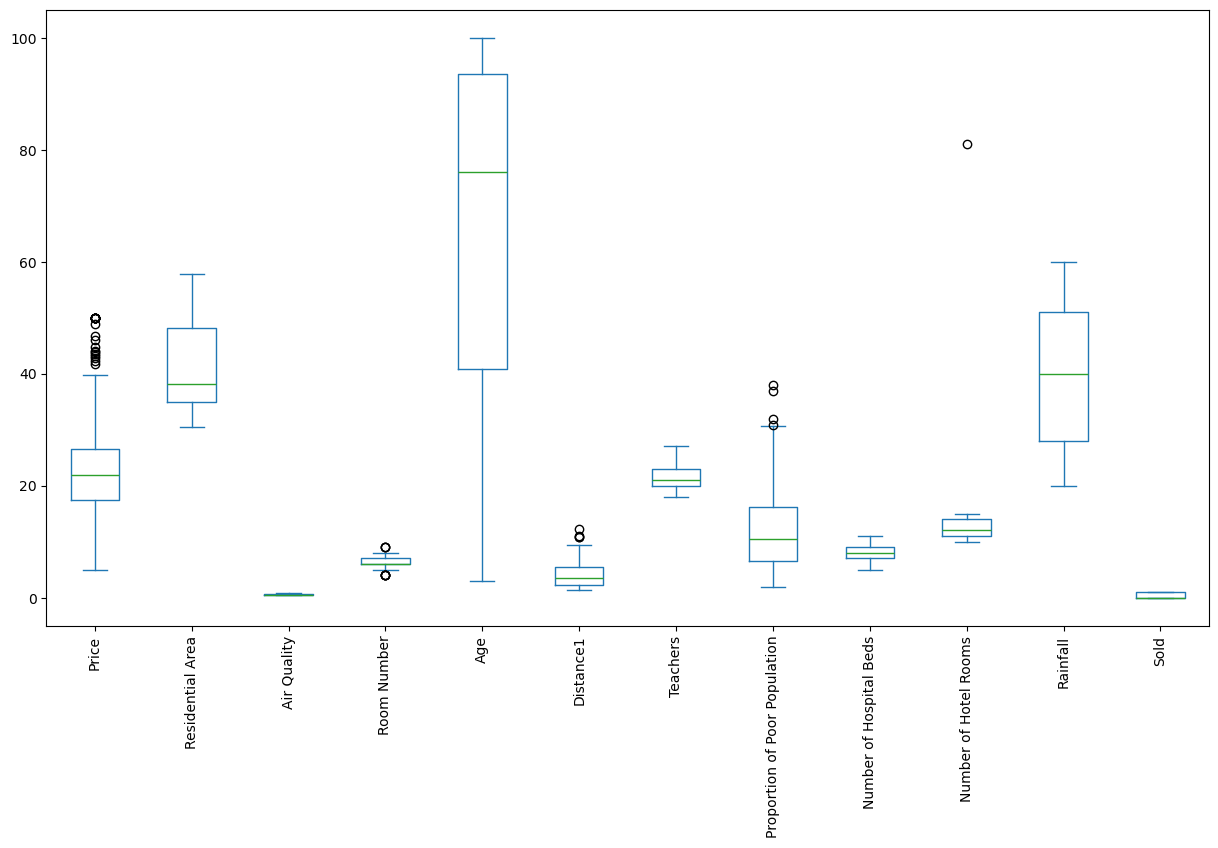

In [38]:
df_house_price.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [39]:
## Outlier treatment on house price data
# Use IQR method

## EDA(Exploratory data analysis)

### univariet analysis

In [42]:
# seperate the categorical and numerical data
df_cat=df_house_price.select_dtypes(include='object')
df_cat.head()

,Airport,Waterbody,Bus Terminal
0,YES,River,YES
1,NO,Lake,YES
3,YES,Lake,YES
4,NO,Lake,YES
6,YES,River,YES


In [43]:
df_num=df_house_price.select_dtypes(include='number')
df_num.head()

,Price,Residential Area,Air Quality,Room Number,Age,Distance1,Teachers,Proportion of Poor Population,Number of Hospital Beds,Number of Hotel Rooms,Rainfall,Sold
0,24.0,32.31,0.538,7.0,65.2,4.35,25.0,4.98,5.0,11.0,23,0
1,21.6,37.07,0.469,6.0,78.9,4.99,22.0,9.14,7.0,12.0,42,1
3,33.4,32.18,0.458,7.0,45.8,6.21,21.0,2.94,9.0,11.0,45,0
4,36.2,32.18,0.458,7.0,54.2,6.16,21.0,5.33,9.0,11.0,55,0
6,22.9,37.87,0.524,6.0,66.6,5.87,25.0,12.43,7.0,12.0,41,1


#### univariet analysis on categorical data

In [45]:
df_cat.head()

,Airport,Waterbody,Bus Terminal
0,YES,River,YES
1,NO,Lake,YES
3,YES,Lake,YES
4,NO,Lake,YES
6,YES,River,YES


#### Airport

In [47]:
# find the count of each category
df_cat.Airport.value_counts()

Airport
YES    187
NO     156
Name: count, dtype: int64

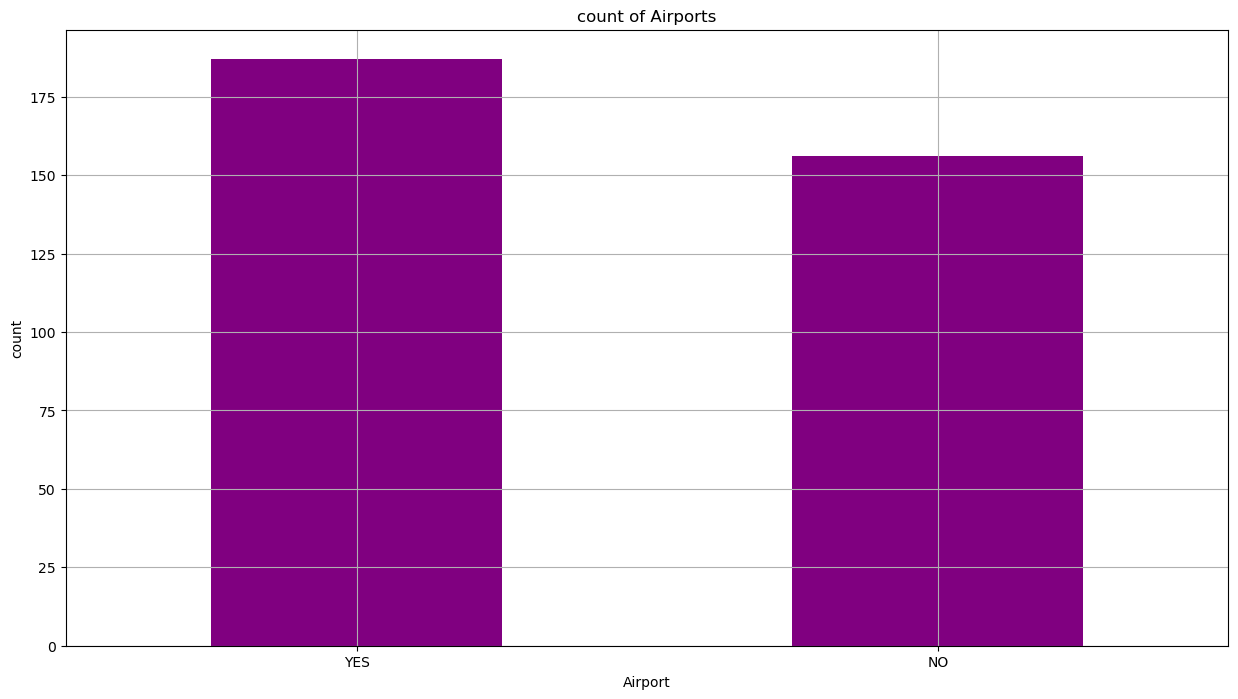

In [48]:
# visualize the categorical data
df_cat.Airport.value_counts().plot(kind='bar',color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('count of Airports')
plt.ylabel('count')
plt.show()

# used pandas for visulization

**interpretation**
 - there are two categories in the airport column
 - there are 187 places where airport is present
 - there are 156 places where airport is not present
 - the data is balanced here

In [50]:
df_cat.columns

Index(['Airport', 'Waterbody', 'Bus Terminal'], dtype='object')

#### Waterbody

In [52]:
# find the value count
df_cat.Waterbody.value_counts()

Waterbody
River             178
Lake               94
Lake and River     71
Name: count, dtype: int64

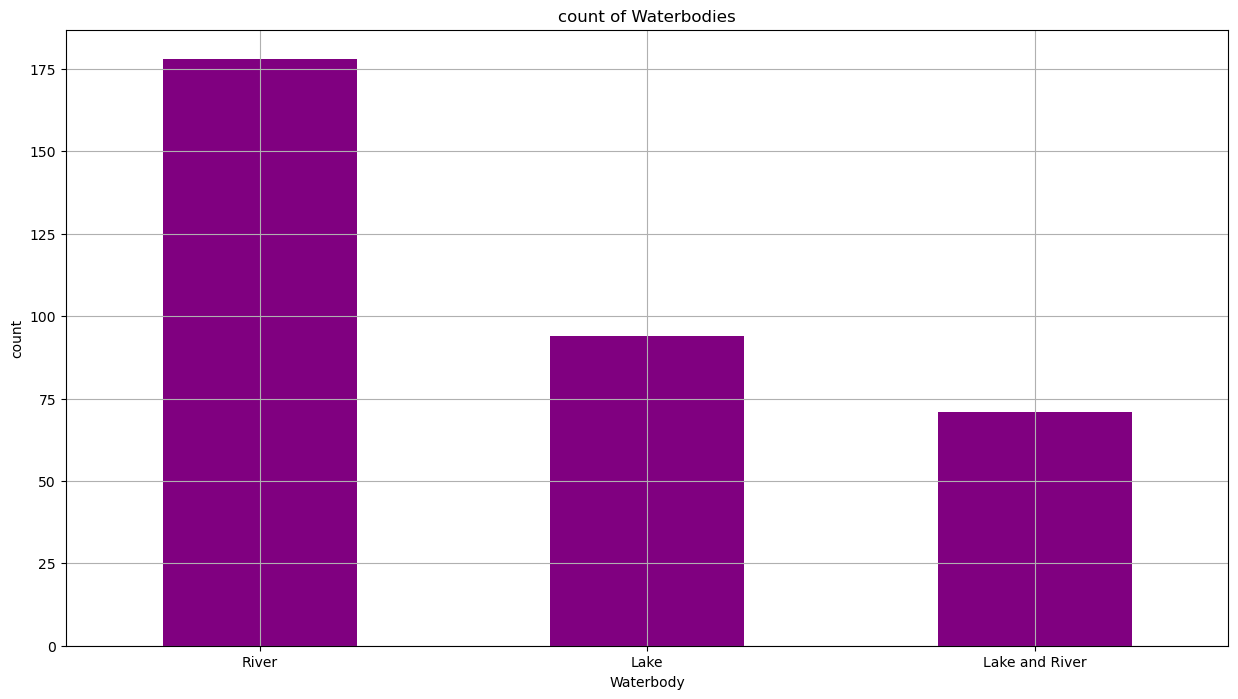

In [53]:
# visualize the categorical data
df_cat.Waterbody.value_counts().plot(kind='bar',color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('count of Waterbodies')
plt.ylabel('count')
plt.show()

**Interpretation**
 - There are 3 categories which are River, Lake waterbody, Lake and River both
 - There are 178 places where River is a source of fresh water.
 - There are 94 places where Lake is a source of fresh water.
 - There are 71 places where River and Lake both are a source of fresh water.
 - Our of all The River is the dominant one.

In [55]:
df_cat.columns

Index(['Airport', 'Waterbody', 'Bus Terminal'], dtype='object')

#### Bus Terminal

In [57]:
# find the value count
df_cat['Bus Terminal'].value_counts()

Bus Terminal
YES    343
Name: count, dtype: int64

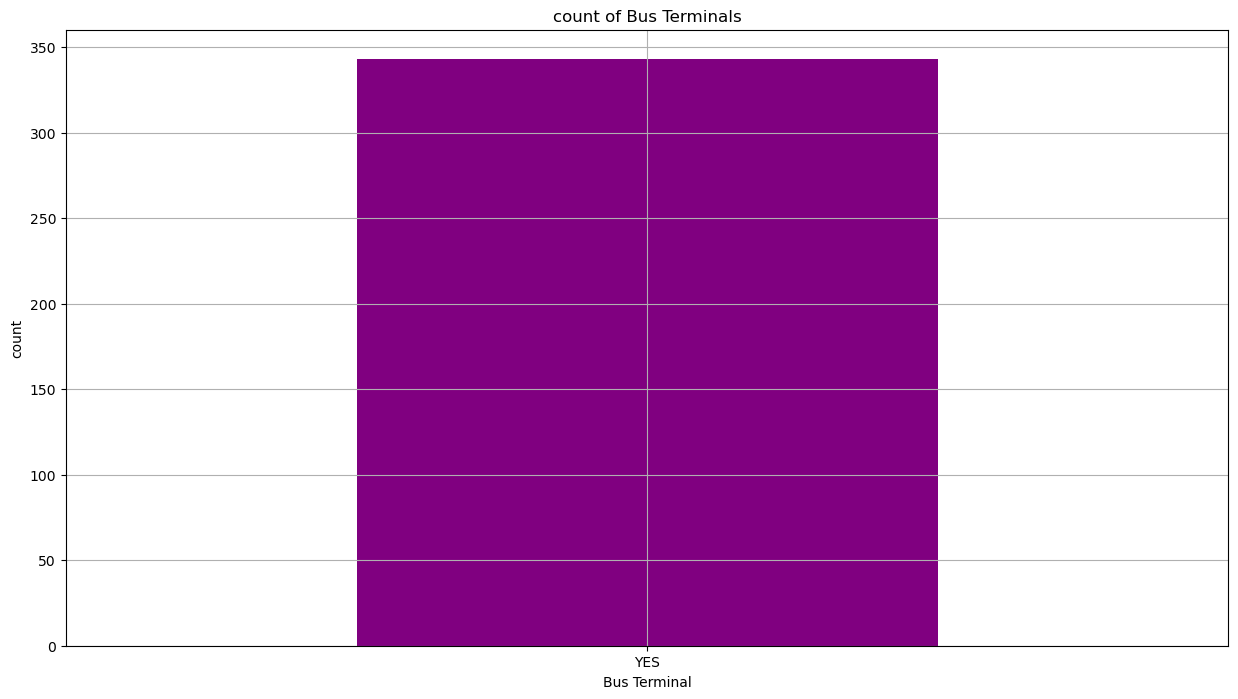

In [58]:
# visualize the categorical data
df_cat['Bus Terminal'].value_counts().plot(kind='bar',color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('count of Bus Terminals')
plt.ylabel('count')
plt.show()

**Interpretation**
- We have only one category in the bus terminal column
- ACTION : So, we can remove this column

In [60]:
df_cat=df_cat.drop('Bus Terminal',axis=1)
df_house_price=df_house_price.drop('Bus Terminal',axis=1)

In [61]:
df_cat.columns

Index(['Airport', 'Waterbody'], dtype='object')

In [62]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Univariet analysis on the numerical data

In [64]:
df_num.head()

,Price,Residential Area,Air Quality,Room Number,Age,Distance1,Teachers,Proportion of Poor Population,Number of Hospital Beds,Number of Hotel Rooms,Rainfall,Sold
0,24.0,32.31,0.538,7.0,65.2,4.35,25.0,4.98,5.0,11.0,23,0
1,21.6,37.07,0.469,6.0,78.9,4.99,22.0,9.14,7.0,12.0,42,1
3,33.4,32.18,0.458,7.0,45.8,6.21,21.0,2.94,9.0,11.0,45,0
4,36.2,32.18,0.458,7.0,54.2,6.16,21.0,5.33,9.0,11.0,55,0
6,22.9,37.87,0.524,6.0,66.6,5.87,25.0,12.43,7.0,12.0,41,1


#### Price

In [66]:
# find the minimum 
df_num.Price.min()

5.0

In [67]:
# find the maximum
df_num.Price.max()

50.0

In [68]:
# find the average/mean
round(df_num.Price.mean(),3)

23.085

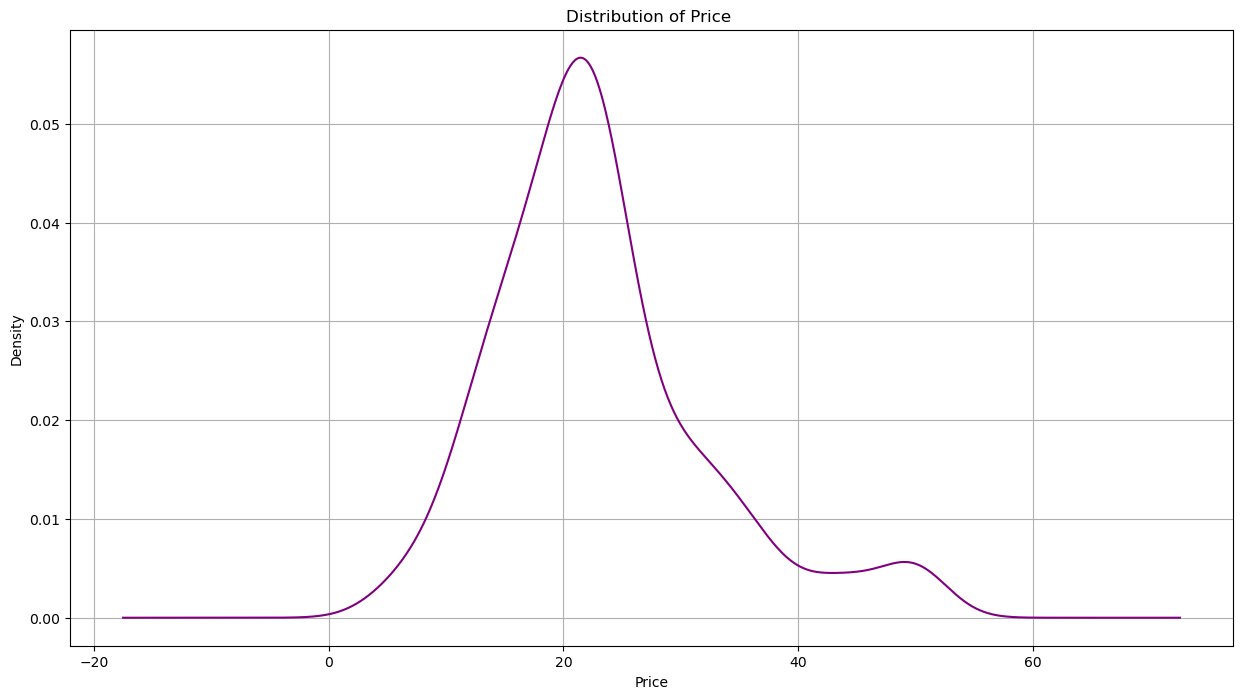

In [69]:
# Visualize the distribution
df_num.Price.plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Price ')
plt.xlabel('Price')
plt.show()

**Interpreation**
 - Minimum price of the house is 5 Lakh rupees.
 - Maximum price of the house is 50 Lakh rupees.
 - Average price of the house is 23.085 Lakh rupees.
 - According to the distribution most of the houses price lie between 5 lakh to 40 lakh

In [71]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Residential Area

In [73]:
# find the minimum 
df_num['Residential Area'].min()

30.46

In [74]:
# find the maximum
df_num['Residential Area'].max()

57.74

In [75]:
# find the average/mean
round(df_num['Residential Area'].mean(),3)

40.717

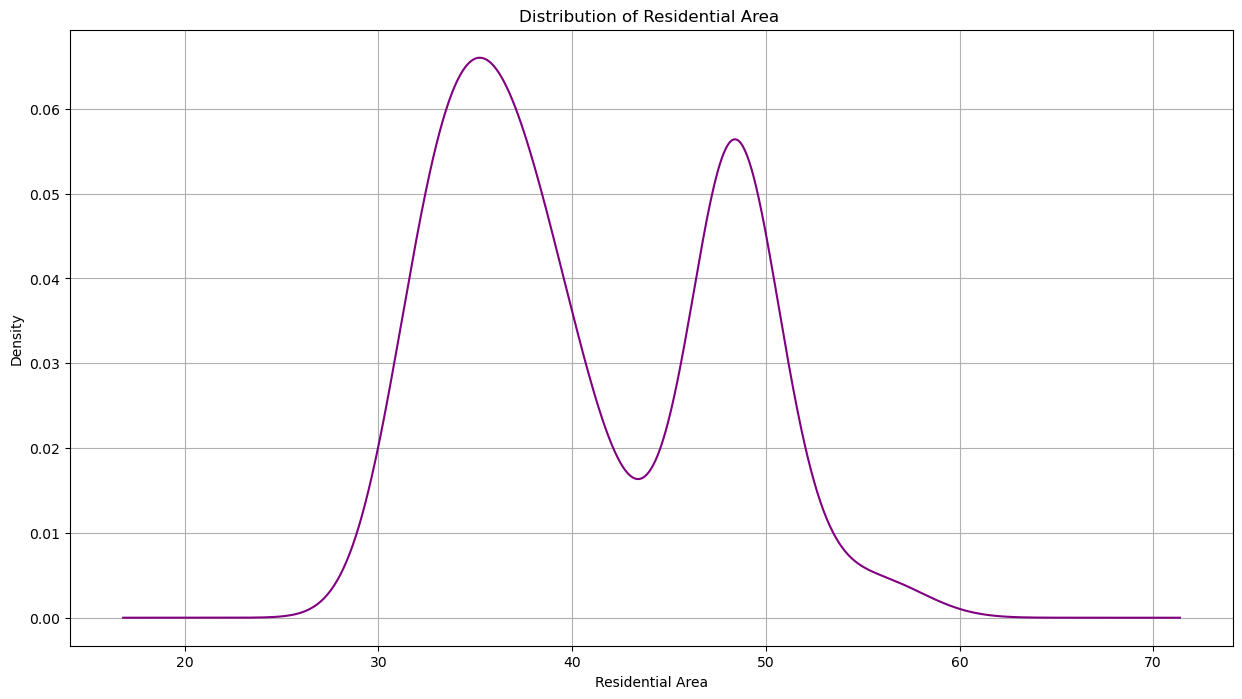

In [76]:
df_num['Residential Area'].plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Residential Area ')
plt.xlabel('Residential Area')
plt.show()

**Interpreation**
 - Minimum Residential Area where my house is located is 30.46.
 - Maximum Residential Area where my house is located is 57.74.
 - Average Residential Area where my house is located is 40.717.
 - This is an multi model data
 - The first peak is from 30 to 40 and second peak is at 45 to 55.

In [78]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Air Quality

In [80]:
# find the minimum 
df_num['Air Quality'].min()

0.392

In [81]:
# find the maximum
df_num['Air Quality'].max()

0.871

In [82]:
# find the average/mean
round(df_num['Air Quality'].mean(),3)

0.548

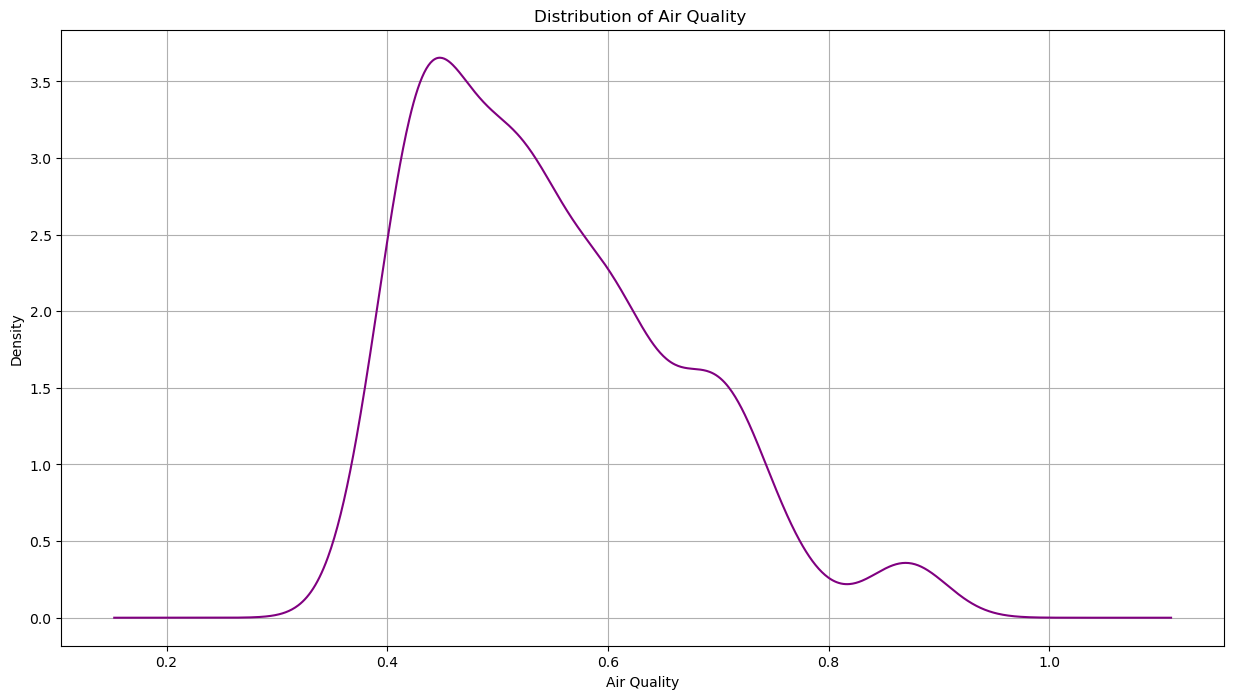

In [83]:
df_num['Air Quality'].plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Air Quality ')
plt.xlabel('Air Quality')
plt.show()

**Interpretation**
 - Minimum Air Quality where my house is located is 0.392.
 - Maximum Air Quality where my house is located is 0.871.
 - Average Air Quality where my house is located is 0.548.

In [85]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Room Number

In [87]:
# find the minimum 
df_num['Room Number'].min()

4.0

In [88]:
# find the maximum 
df_num['Room Number'].max()

9.0

In [89]:
# find the Average/Mean 
round(df_num['Room Number'].mean(),3)

6.3

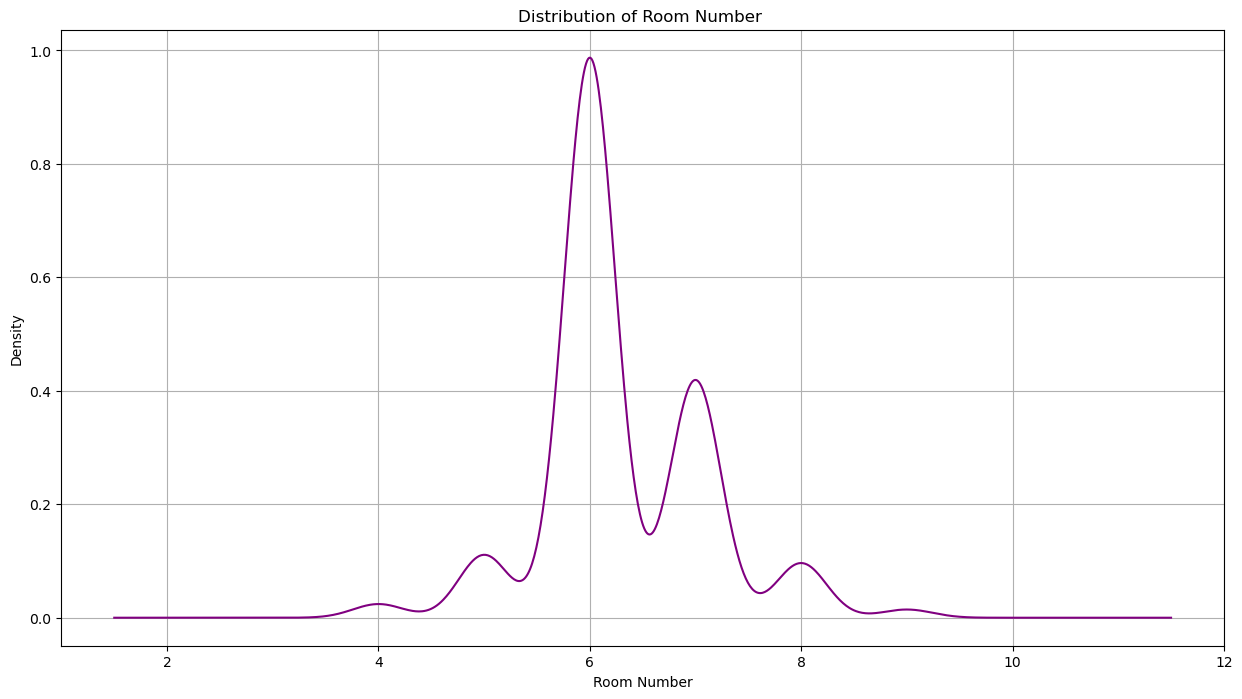

In [90]:
df_num['Room Number'].plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Room Number ')
plt.xlabel('Room Number')
plt.show()

**Interpretation**
 - Minimum Room Number where my house is located is 4.
 - Maximum Room Number where my house is located is 9.
 - Average Room Number where my house is located is 6.3.

In [92]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Age

In [94]:
# find the minimum 
round(df_num.Age.min(),1)

2.9

In [95]:
# find the maximum
df_num.Age.max()

100.0

In [96]:
# find the Average/mean 
round(df_num.Age.mean(),1)

66.6

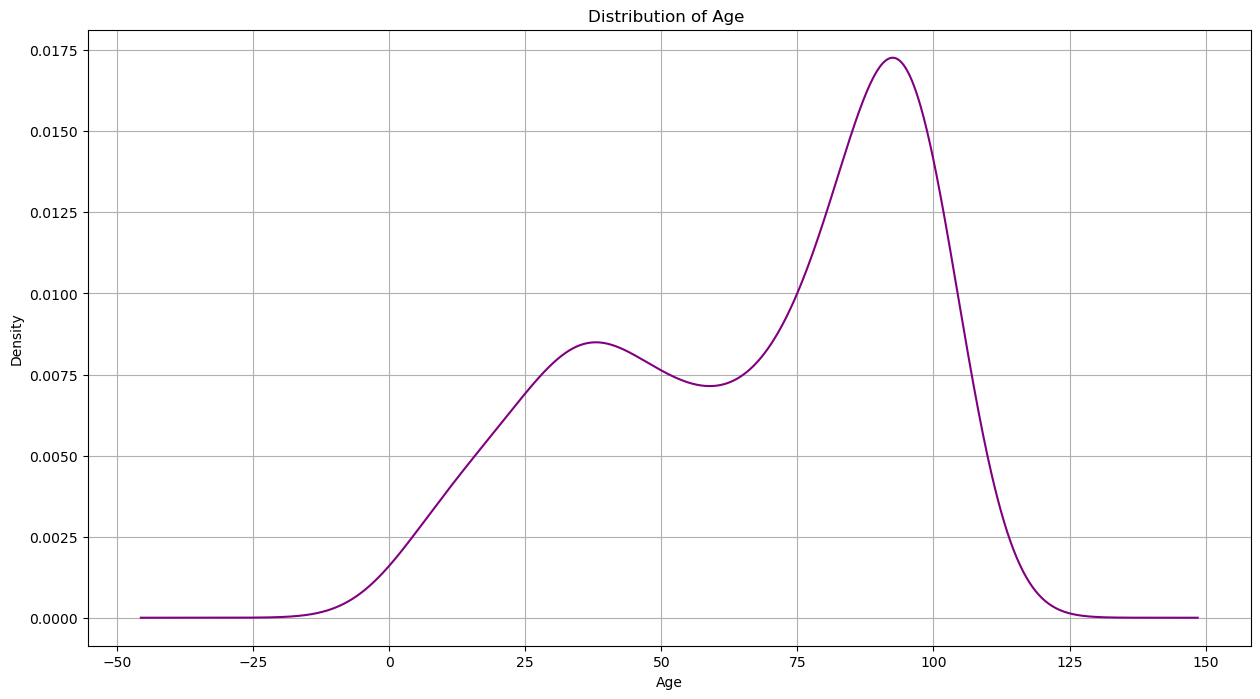

In [97]:
df_num.Age.plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Age ')
plt.xlabel('Age')
plt.show()

**Interpretation**
 - Minimum Age is 2.9.
 - Maximum Age is 100.
 - Average Age 66.6.

In [99]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Distance1

In [101]:
# find the minimum
df_num.Distance1.min()

1.34

In [102]:
# find the maximum
df_num.Distance1.max()

12.32

In [103]:
# find the Average/mean
round(df_num.Distance1.mean(),3)

4.055

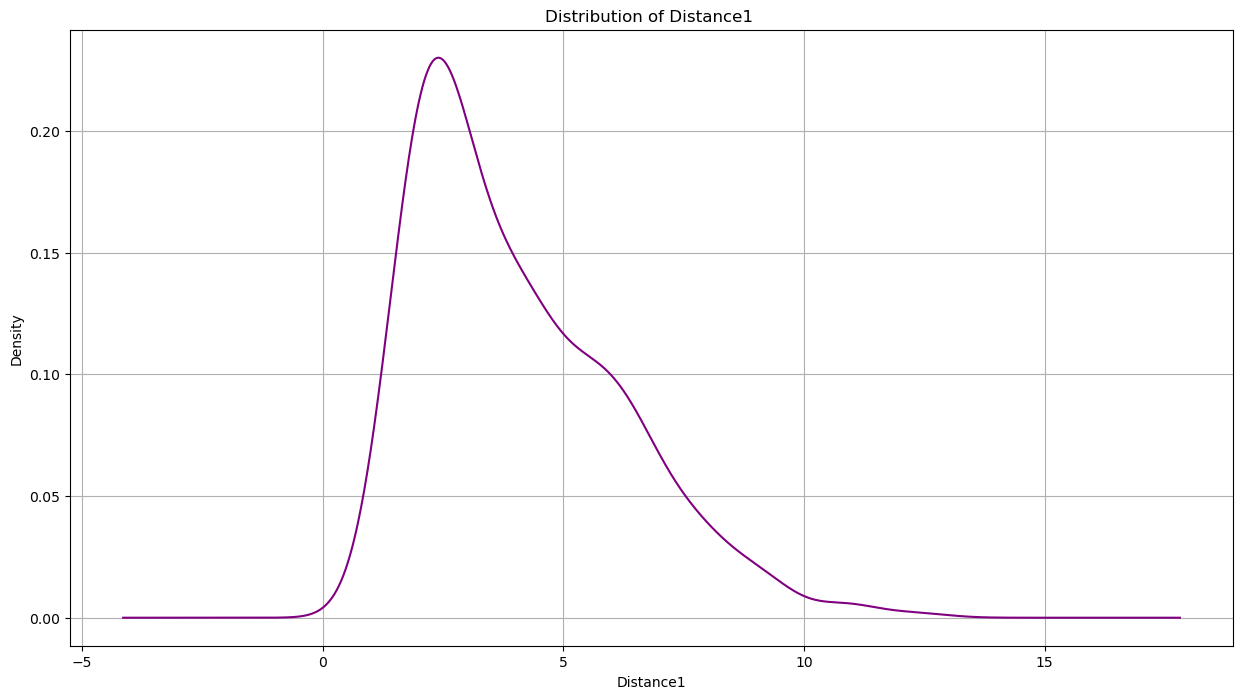

In [104]:
df_num.Distance1.plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Distance1 ')
plt.xlabel('Distance1')
plt.show()

**Interpretation**
 - Minimum Distance1 is 1.34. - Maximum Distance1 is 2.320. 
 - Average Distance1 is 4.055.

In [106]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Teachers

In [108]:
# find the Total
df_num.Teachers.sum()

7449.0

In [109]:
# find the minimum
df_num.Teachers.min()

18.0

In [110]:
# find the maximum
df_num.Teachers.max()

27.0

In [111]:
# find the average
round(df_num.Teachers.mean(),3)

21.717

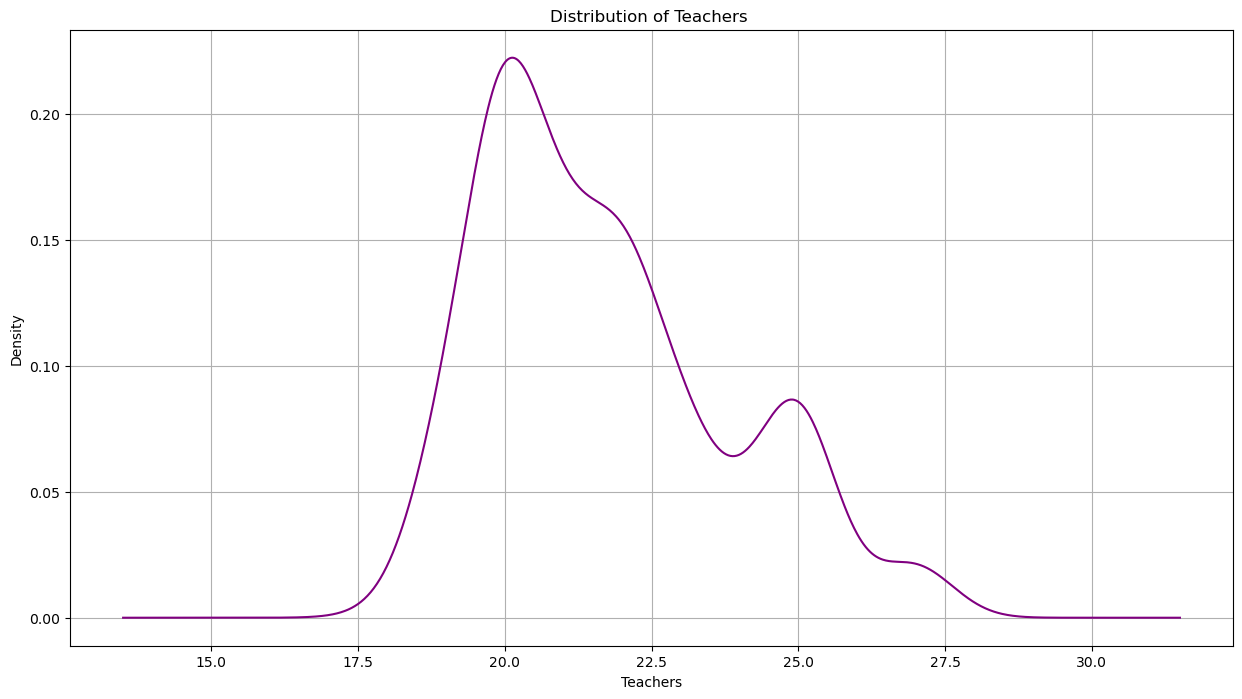

In [112]:
df_num.Teachers.plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Teachers ')
plt.xlabel('Teachers')
plt.show()

**Interpretation**
 - Minimum Teachers is 18.
 - Maximum Teachers is 27.
 - Total sum of Teachers is 7449.
 - Average Teachers is 21.717.

In [114]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Proportion of Poor Population

In [116]:
# find the minimum 
df_num['Proportion of Poor Population'].min()

1.92

In [117]:
# find the maximum 
df_num['Proportion of Poor Population'].max()

37.97

In [118]:
# find the average
round(df_num['Proportion of Poor Population'].mean(),3)

12.112

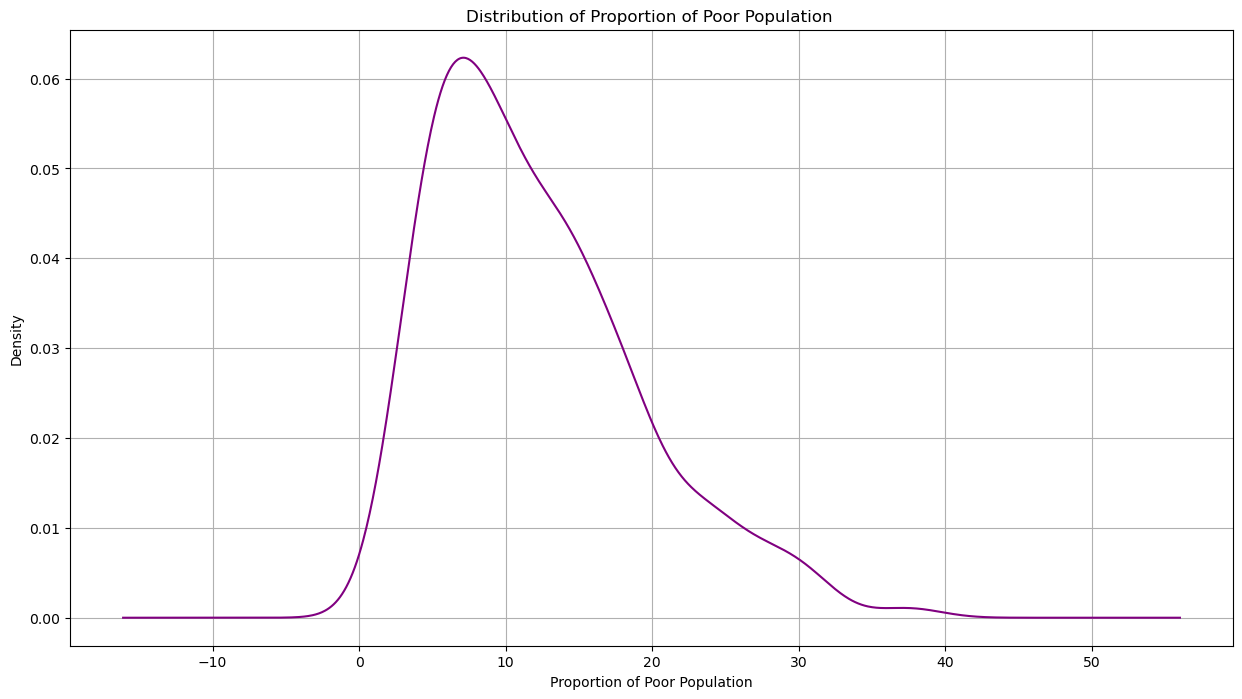

In [119]:
df_num['Proportion of Poor Population'].plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Proportion of Poor Population ')
plt.xlabel('Proportion of Poor Population')
plt.show()

**Interpretation**
 - Minimum Proportion of Poor Population is 1.92
 - Maximum Proportion of Poor Population is 37.97
 - Average Proportion of Poor Population is 12.112

In [121]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Number of Hospital Beds

In [123]:
# find the minimum 
df_num['Number of Hospital Beds'].min()

5.0

In [124]:
# find the maximum
df_num['Number of Hospital Beds'].max()

11.0

In [125]:
# find the average 
round(df_num['Number of Hospital Beds'].mean(),3)

7.904

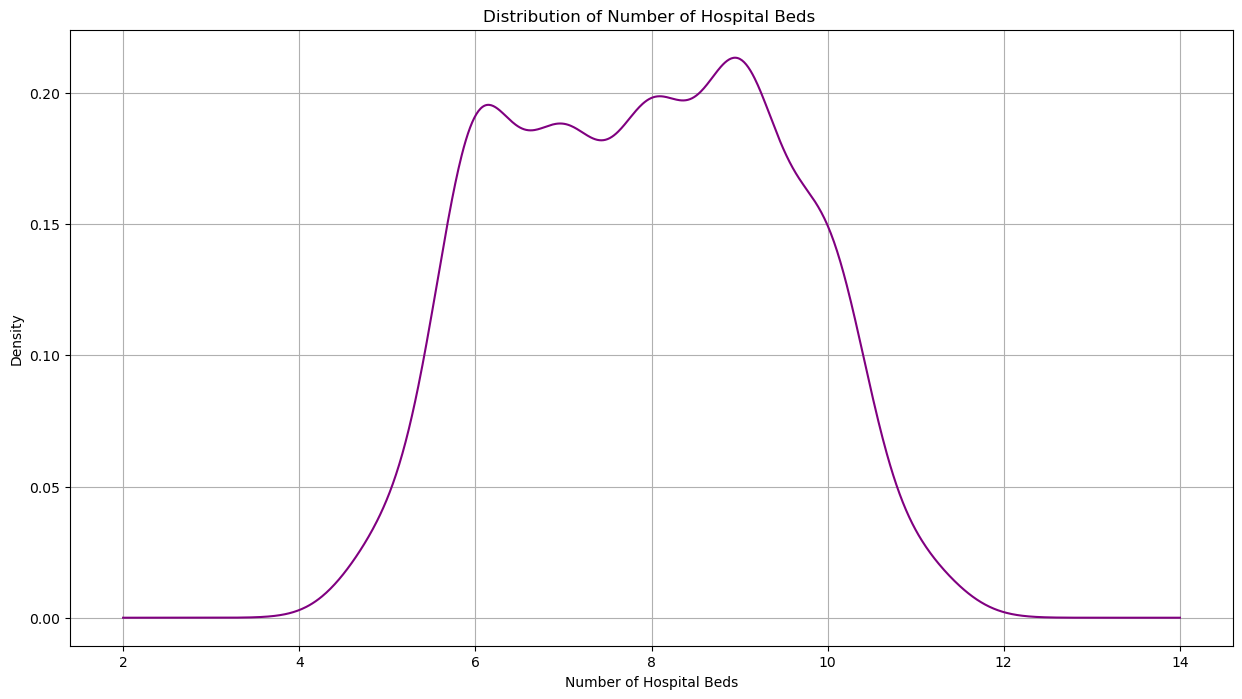

In [126]:
df_num['Number of Hospital Beds'].plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Number of Hospital Beds ')
plt.xlabel('Number of Hospital Beds')
plt.show()

**Interpretation**
 - Minimum Number of Hospital Beds are 5
 - Maximum Number of Hospital Beds are 11
 - Average Number of Hospital Beds are 7.9

In [128]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Number of Hotel Rooms

In [130]:
# find the minimum 
df_num['Number of Hotel Rooms'].min()

10.0

In [131]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Rainfall

In [133]:
# find the minimum
df_num.Rainfall.min()

20

In [134]:
# find the maximum
df_num.Rainfall.max()

60

In [135]:
# find the average
round(df_num.Rainfall.mean(),3)

39.621

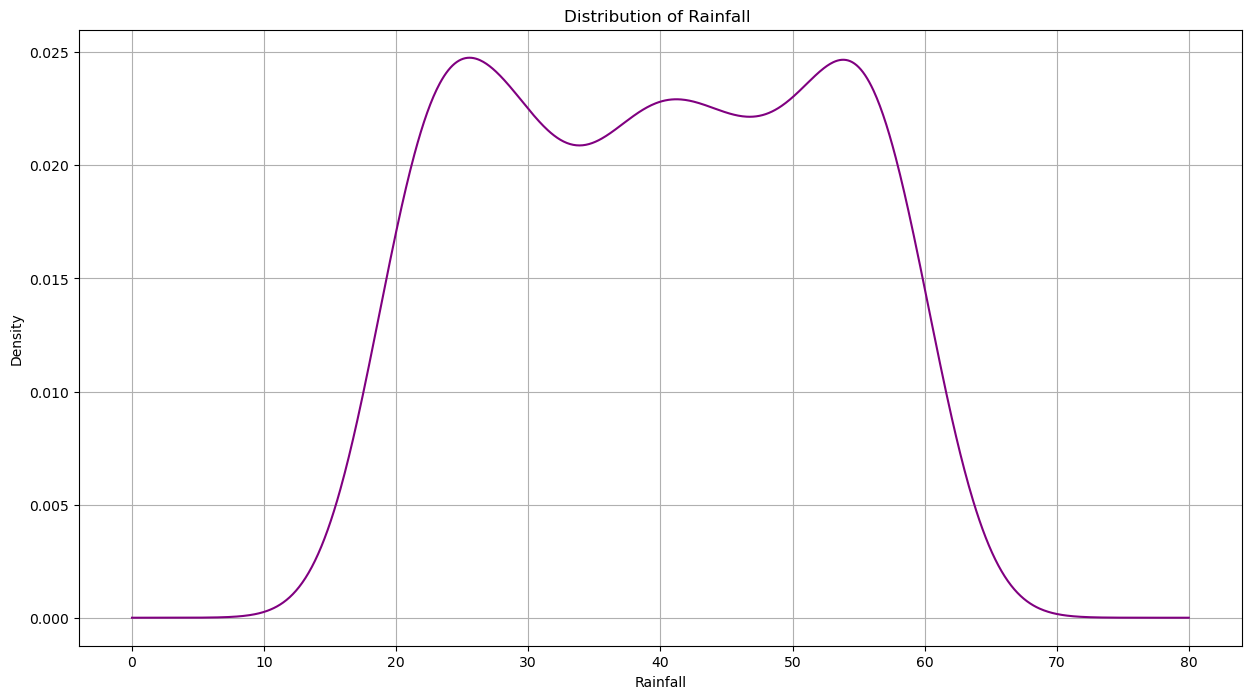

In [136]:
df_num.Rainfall.plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Rainfall ')
plt.xlabel('Rainfall')
plt.show()

**Interpretation**
 - Minimum Rainfall is 20
 - Maximum Rainfall is 60
 - Average Rainfall is 39.621

In [138]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Sold

In [140]:
# find the minimum
df_num.Sold.min()

0

In [141]:
# find the maximum
df_num.Sold.max()

1

In [142]:
# find the average
round(df_num.Sold.mean(),3)

0.461

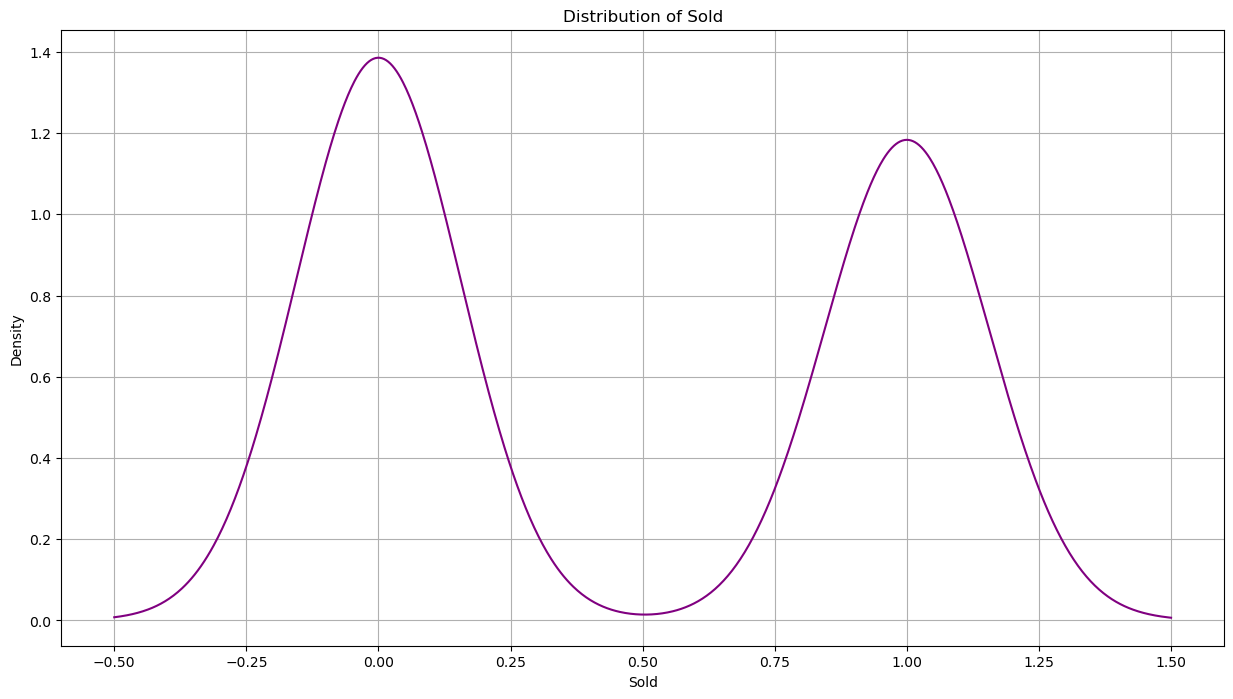

In [143]:
df_num.Sold.plot(kind='kde', color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distribution of Sold')
plt.xlabel('Sold')
plt.show()

**Interpretation**
 - Minimum sold rate is 0
 - maximum sold rate is 1
 - Average sold rate is 0.461
 - This is a multi model.

### Bivariaet analysis

#### Get the numerical pairs

In [147]:
# Step 1
# Find the co-relation matrix
df_num.corr()

,Price,Residential Area,Air Quality,Room Number,Age,Distance1,Teachers,Proportion of Poor Population,Number of Hospital Beds,Number of Hotel Rooms,Rainfall,Sold
Price,1.000000,-0.504032,-0.433390,0.717669,-0.373891,0.255041,0.506594,-0.762028,0.151192,-0.044536,-0.053247,-0.127226
Residential Area,-0.504032,1.000000,0.761049,-0.431057,0.628918,-0.693388,-0.365015,0.631919,-0.055331,0.042955,0.093242,-0.017388
Air Quality,-0.433390,0.761049,1.000000,-0.329545,0.746257,-0.762390,-0.170644,0.624484,-0.107368,0.042286,0.108224,-0.060011
Room Number,0.717669,-0.431057,-0.329545,1.000000,-0.237639,0.230271,0.369748,-0.599565,0.088897,-0.040536,-0.069889,0.004180
Age,-0.373891,0.628918,0.746257,-0.237639,1.000000,-0.744218,-0.240197,0.620302,-0.076692,0.037526,0.084003,-0.055950
Distance1,0.255041,-0.693388,-0.762390,0.230271,-0.744218,1.000000,0.225752,-0.523207,-0.011920,-0.051886,-0.036579,0.005111
Teachers,0.506594,-0.365015,-0.170644,0.369748,-0.240197,0.225752,1.000000,-0.399519,0.037396,-0.059740,-0.107747,0.071987
Proportion of Poor Population,-0.762028,0.631919,0.624484,-0.599565,0.620302,-0.523207,-0.399519,1.000000,-0.117265,0.087192,0.048322,-0.098609
Number of Hospital Beds,0.151192,-0.055331,-0.107368,0.088897,-0.076692,-0.011920,0.037396,-0.117265,1.000000,-0.004018,0.031585,0.066218
Number of Hotel Rooms,-0.044536,0.042955,0.042286,-0.040536,0.037526,-0.051886,-0.059740,0.087192,-0.004018,1.000000,0.009337,-0.055642


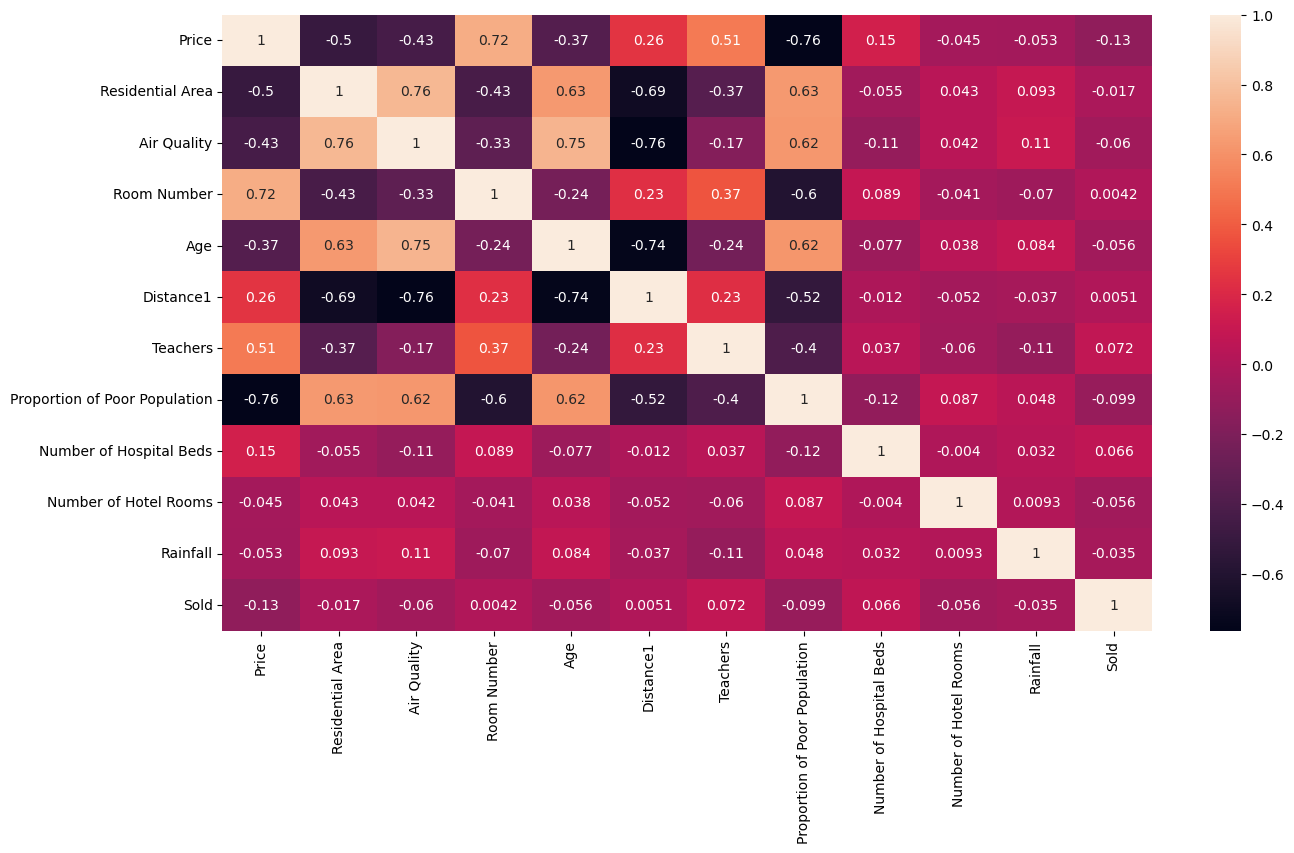

In [148]:
# Visualize the corelation
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [149]:
# pairs for bivariate analysis (numeric)
# Proportion of poor population - Price
# Proportion of poor population - residential Area
# Proportion of poor population - Air Quality
# Proportion of poor population - Room Number
# Proportion of poor population - Age
# Proportion of poor population - Distance1
# Teachers - Price
# Distance1 - Residential Area
# Distance1 - Air Quality
# Distance1 - Age
# Age - Residential Area
# Age - Air Quality
# Room Number - Price
# Air Quality - Residential Area


In [150]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

#### Proportion of poor population - Price

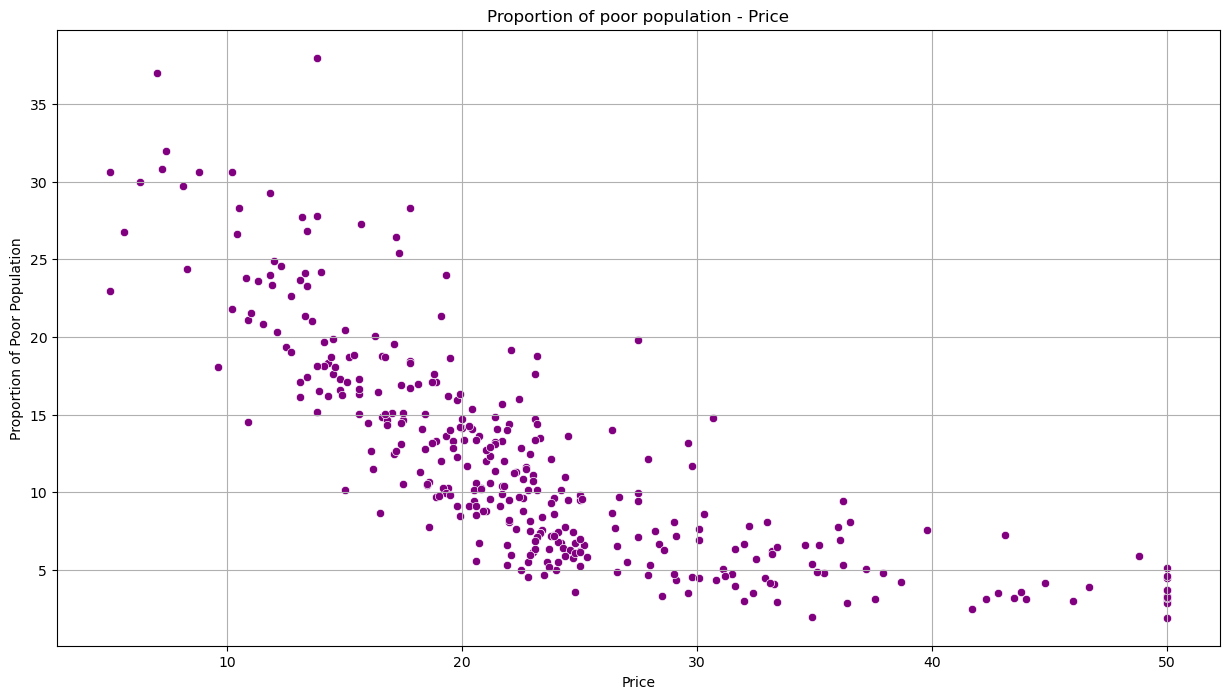

In [152]:
# Scatter plot
sns.scatterplot(x='Price',y='Proportion of Poor Population',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Proportion of poor population - Price')
plt.show()

**Interpretation**
 - There is a strong negative corelation
 - So, when Price of the house increases proportion of poor population decreases

#### Proportion of poor population - residential Area

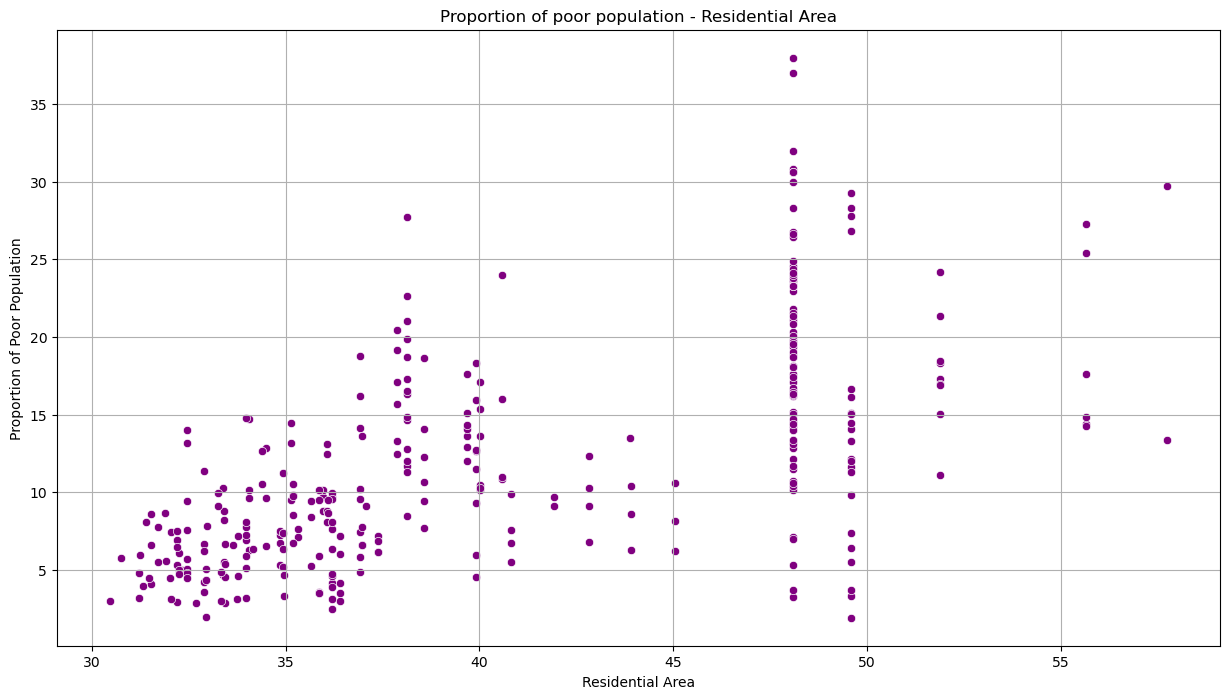

In [155]:
# Scatter plot
sns.scatterplot(x='Residential Area',y='Proportion of Poor Population',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Proportion of poor population - Residential Area')
plt.show()

**Intrepretation**
 - There is a slight relation but that is not for our use.
 - we cannot conclude anything out of it.
 - There is a hetro scadistidtdi

#### Proportion of poor population - Air Quality

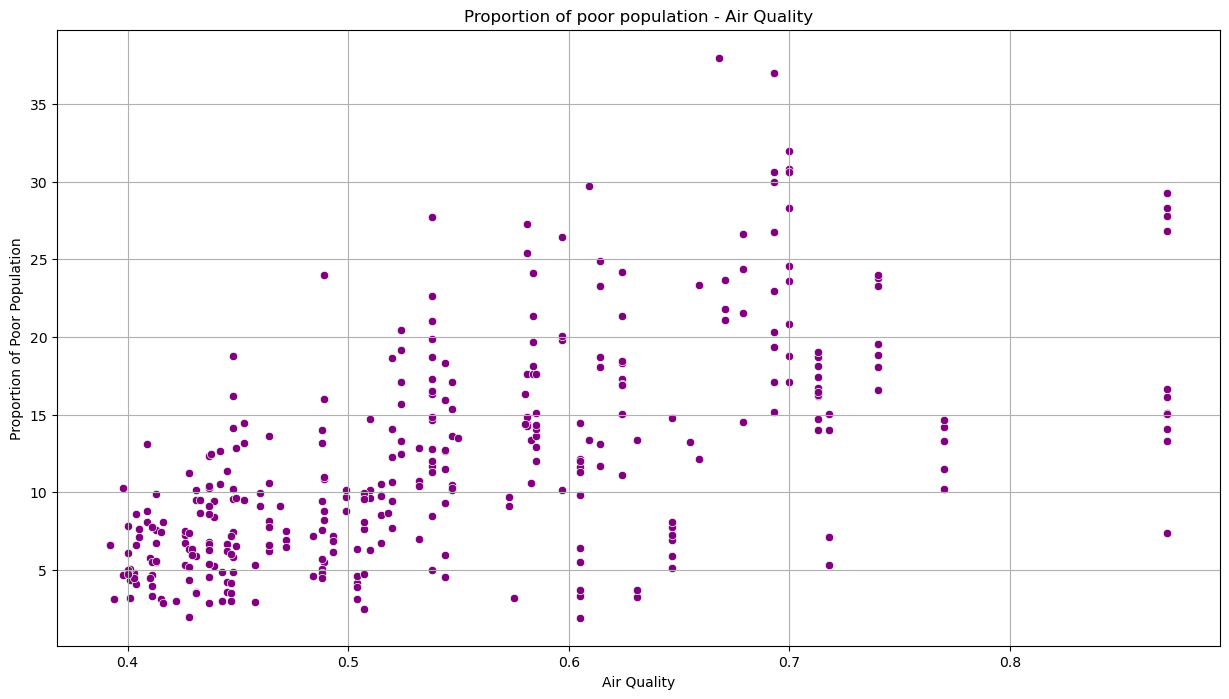

In [158]:
# Scatter plot
sns.scatterplot(x='Air Quality',y='Proportion of Poor Population',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Proportion of poor population - Air Quality')
plt.show()

**Interpretation**
 - there is a hetro scadididty corelation.
 - so i can say that when the air quality is good, possibily the proportion poor population is also good.

#### Proportion of poor population - Room Number

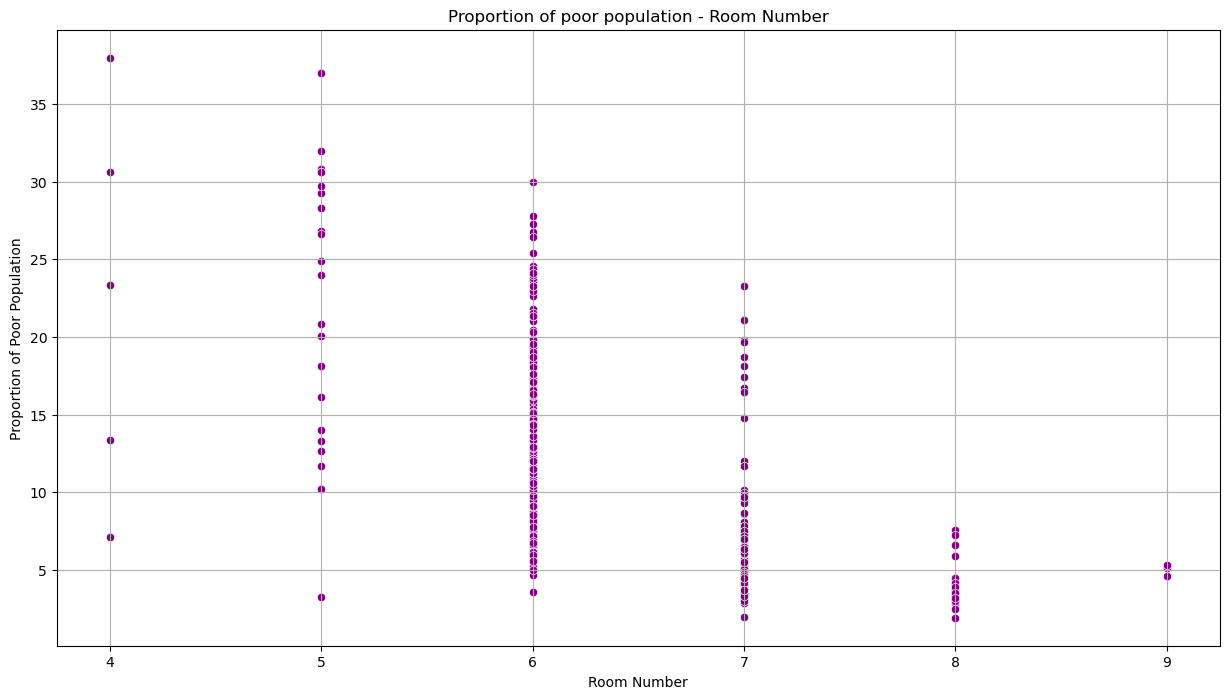

In [161]:
# Scatter plot
sns.scatterplot(x='Room Number',y='Proportion of Poor Population',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Proportion of poor population - Room Number')
plt.show()

**Interpretation**
 - There is hetro scadisisty corelation between Room number and proportion of poor population

#### Proportion of poor population - Age

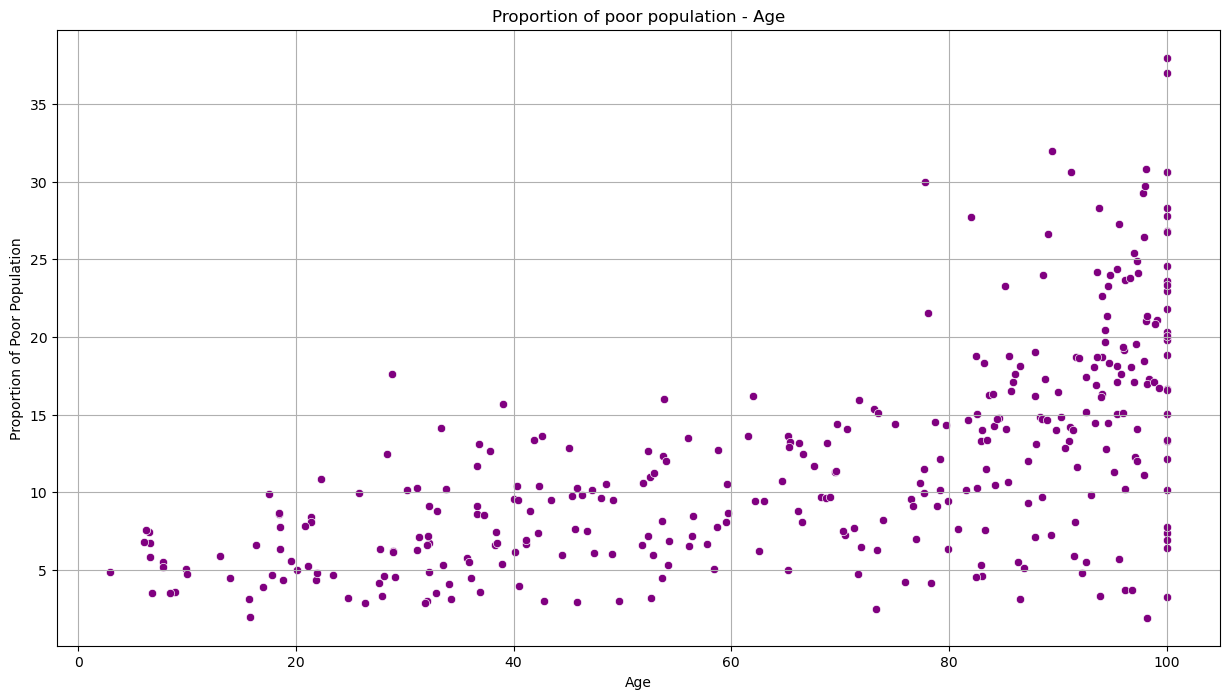

In [164]:
# Scatter plot
sns.scatterplot(x='Age',y='Proportion of Poor Population',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Proportion of poor population - Age')
plt.show()

**Interpretation**
 - There is a weak positive corelation between Age and Proportaion of poor population
 - This means that as the age increases the proportion of poor population is increasing.

#### Proportion of poor population - Distance1

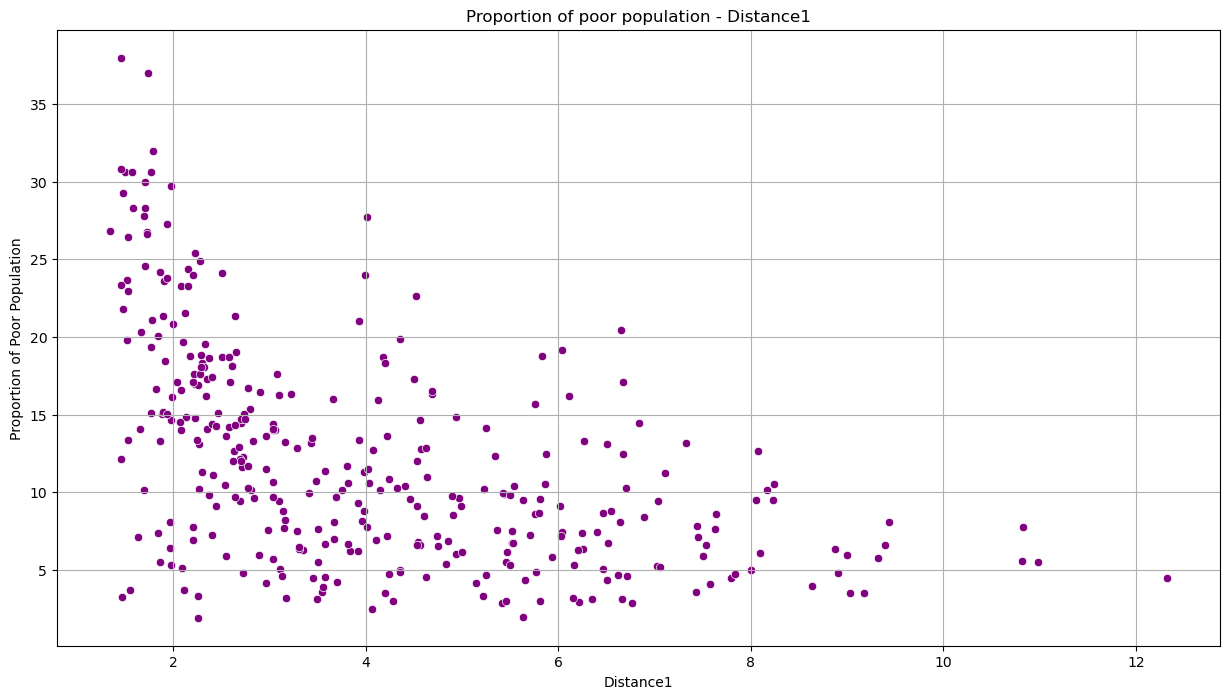

In [167]:
# Scatter plot
sns.scatterplot(x='Distance1',y='Proportion of Poor Population',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Proportion of poor population - Distance1')
plt.show()

**Interpretation**
 - There is a strong negative corelation between Distance1 and Proportion of poor population
 - This says that when the Proportion of poor population are near to the distance and as distance increase the proportion of poor population is decreased

#### Teachers - Price

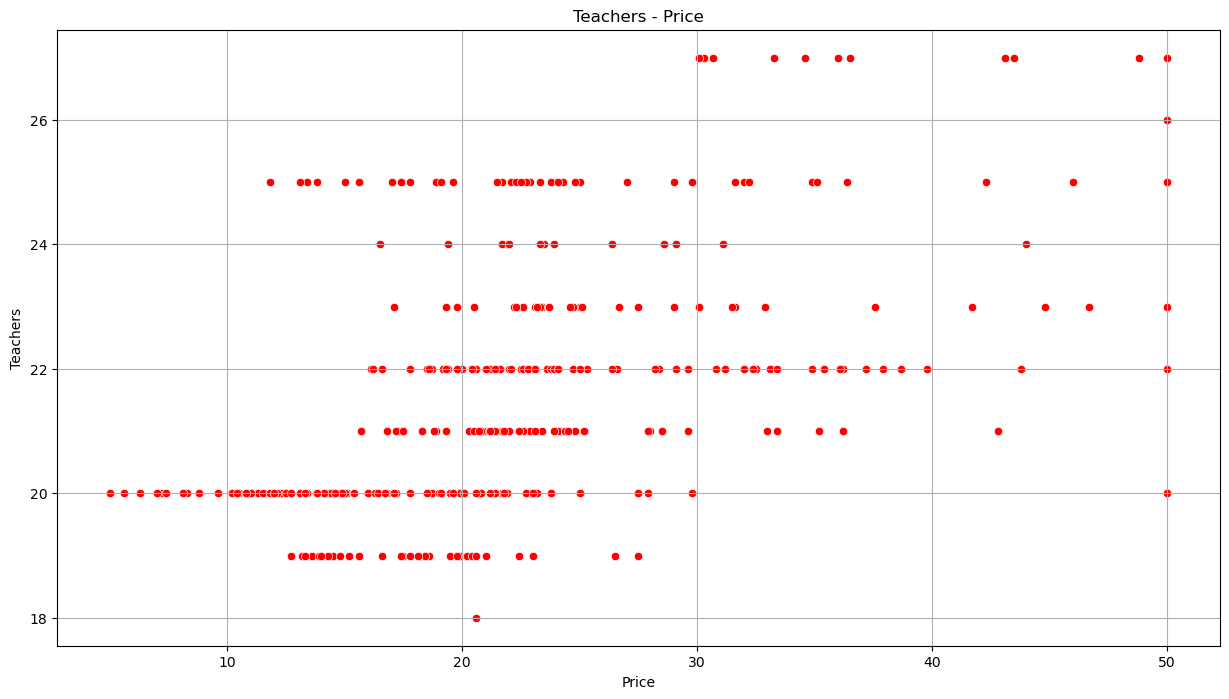

In [170]:
# Scatter plot
sns.scatterplot(x='Price',y='Teachers',data=df_num,color='red')
plt.xticks(rotation=0)
plt.grid()
plt.title('Teachers - Price')
plt.show()

**Interpretation**
 - There is a hetro sacadisisty

#### Distance1 - Residential Area

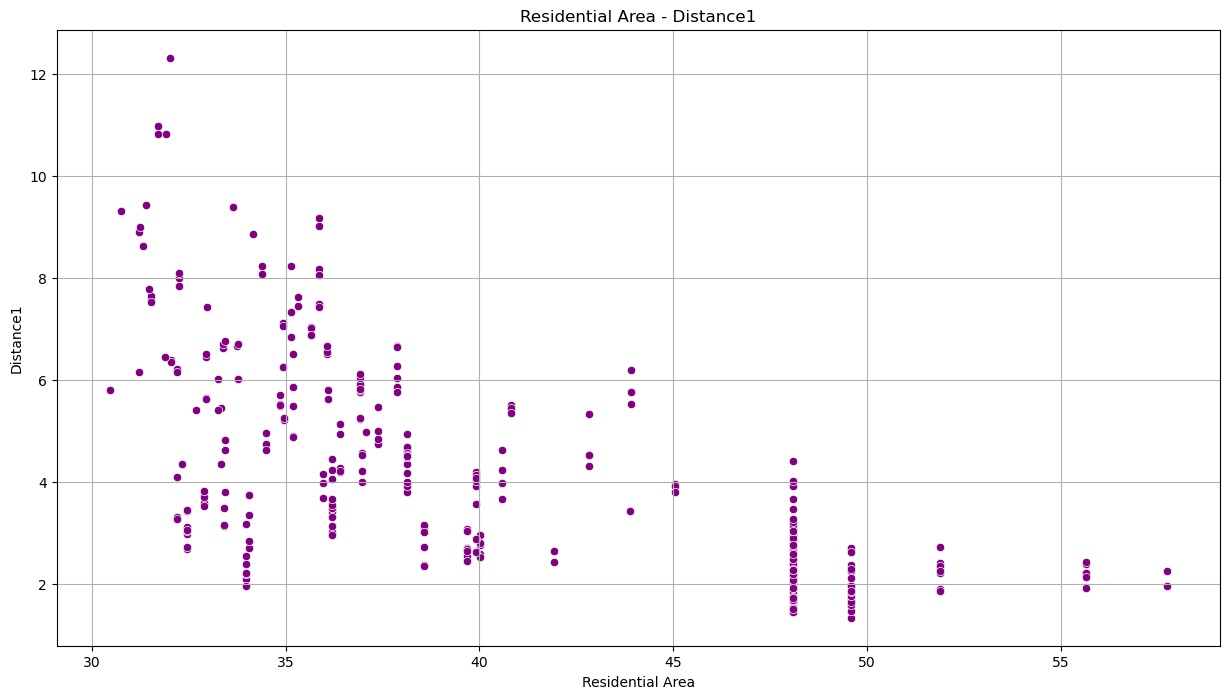

In [173]:
# Scatter plot
sns.scatterplot(x='Residential Area',y='Distance1',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Residential Area - Distance1')
plt.show()

**Interpretation**
 - There is a weak negative corelation
 - This means that there are 

#### Distance1 - Air Quality

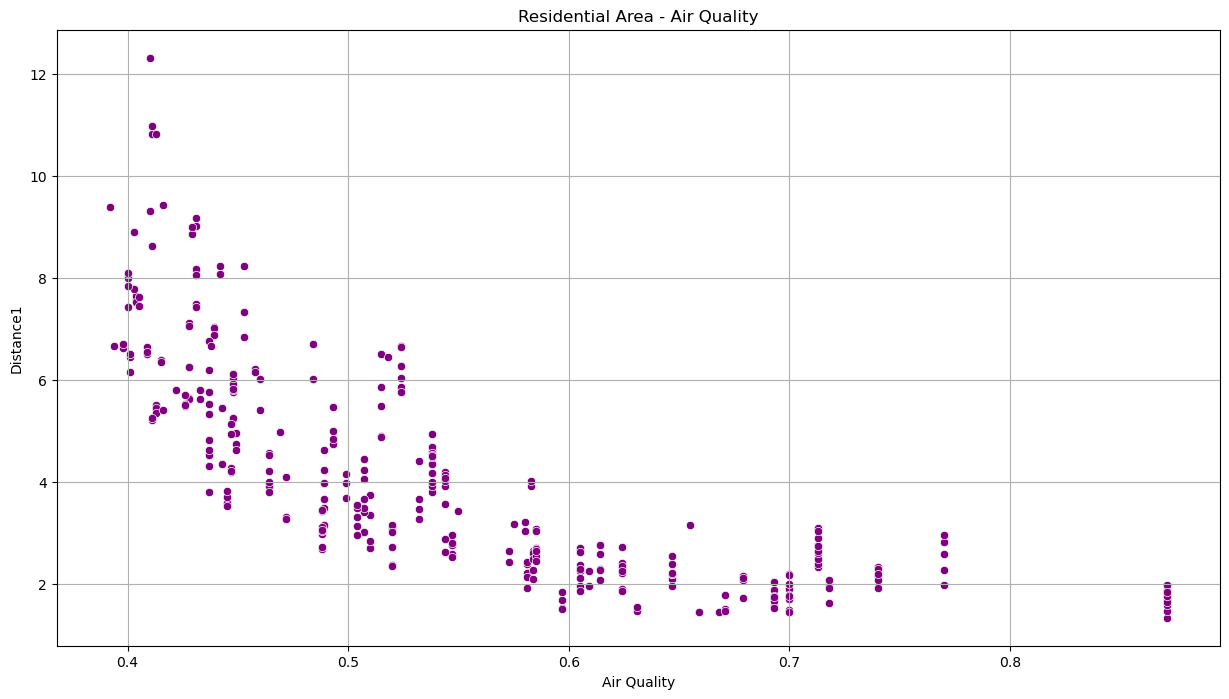

In [176]:
# Scatter plot
sns.scatterplot(x='Air Quality',y='Distance1',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Residential Area - Air Quality')
plt.show()

**Interpretation**
 - There is a strong negative corelation
 - This means that the lesser the Air quality is the more the distance increase

#### Distance1 - Age

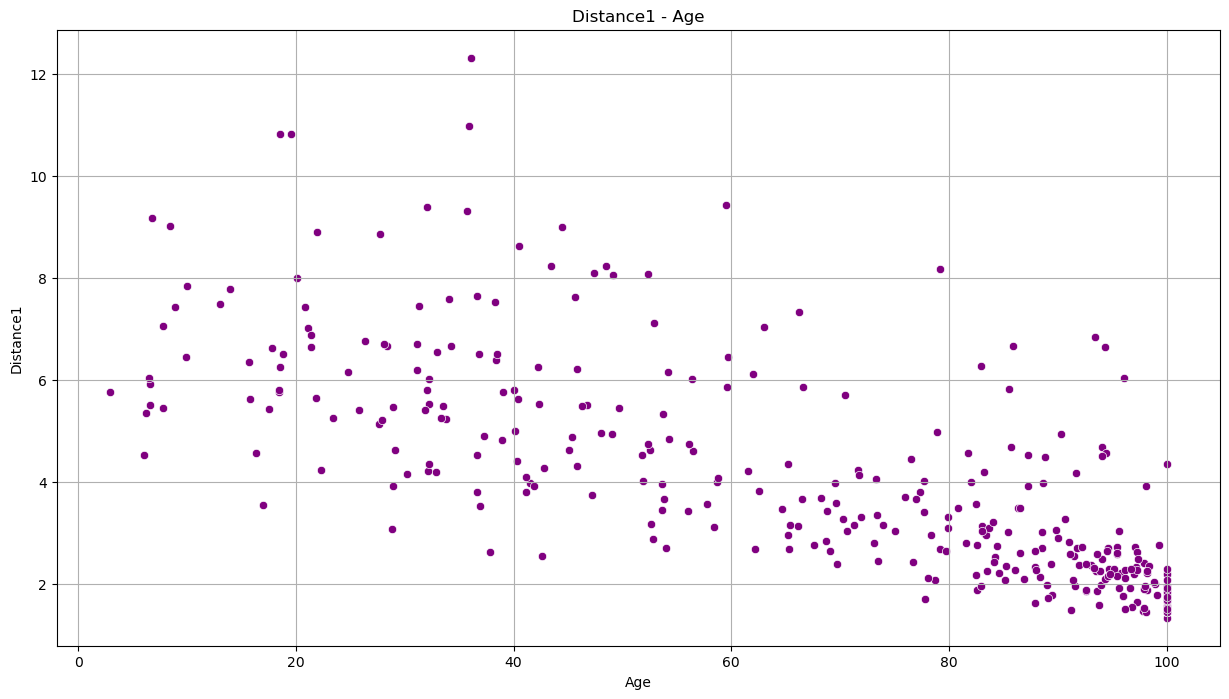

In [179]:
# Scatter plot
sns.scatterplot(x='Age',y='Distance1',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distance1 - Age')
plt.show()

**Interpretation**
 - There is a storng negative corelation
 - This means that as the Age increased the people tend to stay in lesser distance.

#### Age - Residential Area

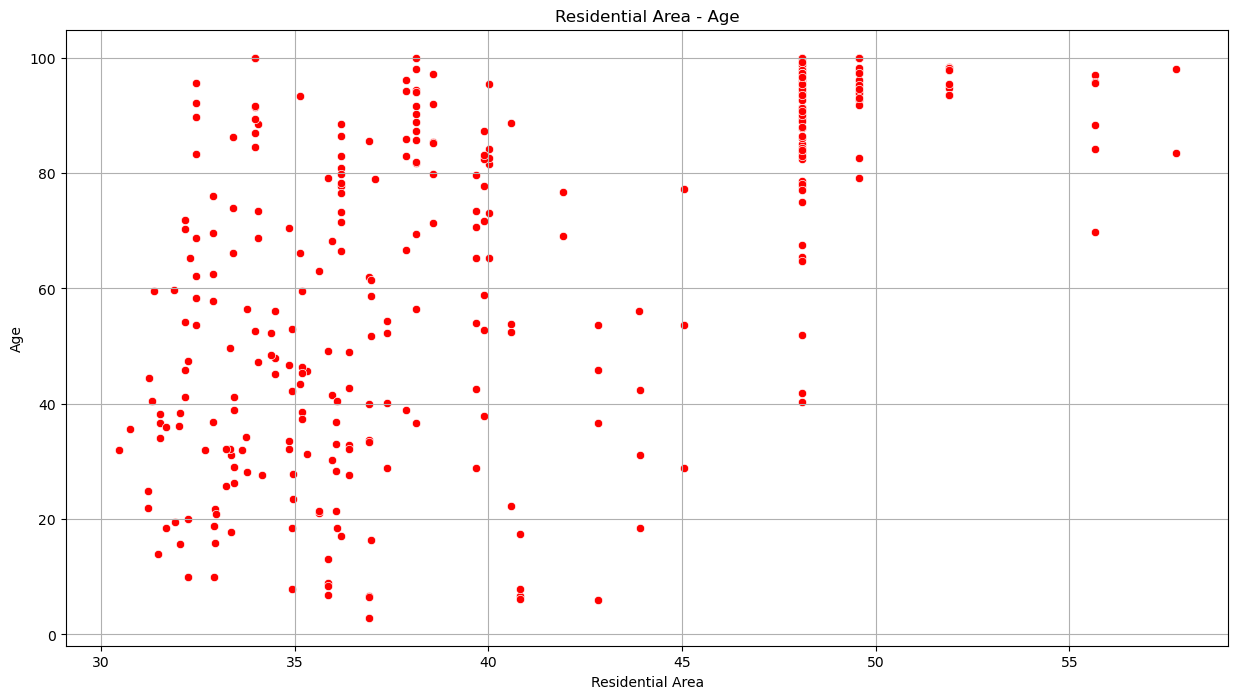

In [182]:
# Scatter plot
sns.scatterplot(x='Residential Area',y='Age',data=df_num,color='red')
plt.xticks(rotation=0)
plt.grid()
plt.title('Residential Area - Age')
plt.show()

**Interpretation**
 - Homo scadisity

#### Age - Air Quality

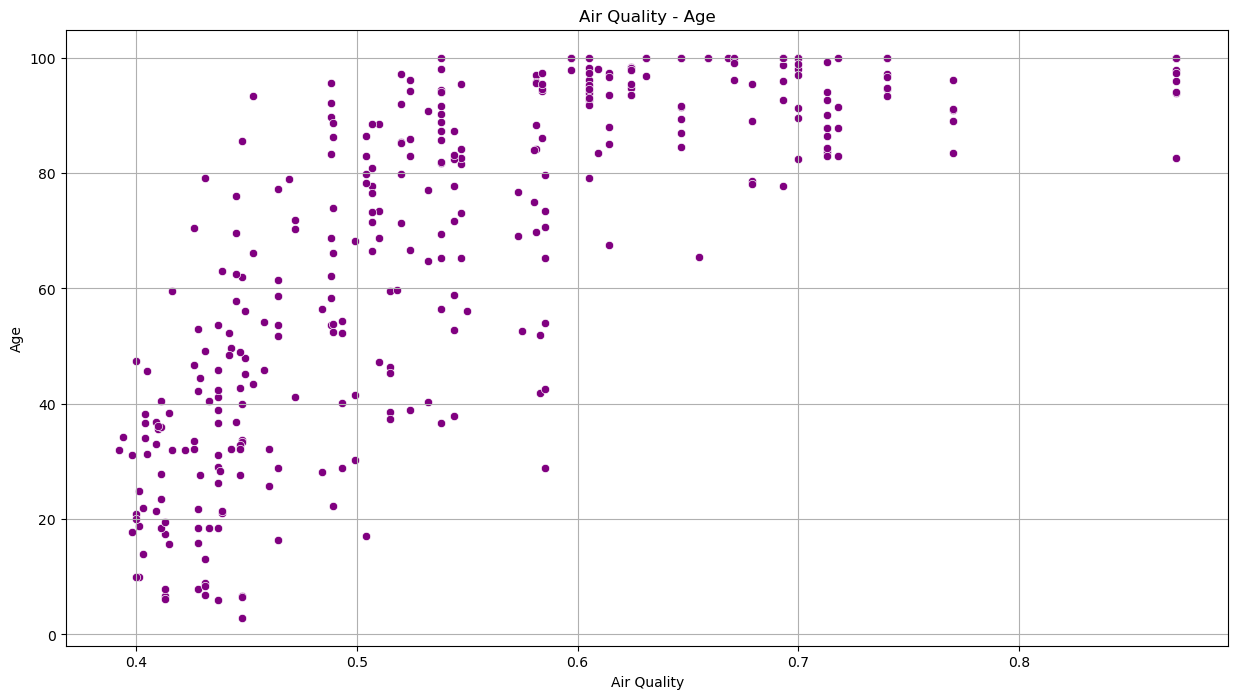

In [185]:
# Scatter plot
sns.scatterplot(x='Air Quality',y='Age',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Air Quality - Age')
plt.show()

**Interpretation**
 - There is a hetro scadististy
 - This graph says that the more younger people are living in lesser Air Quality

#### Room Number - Price

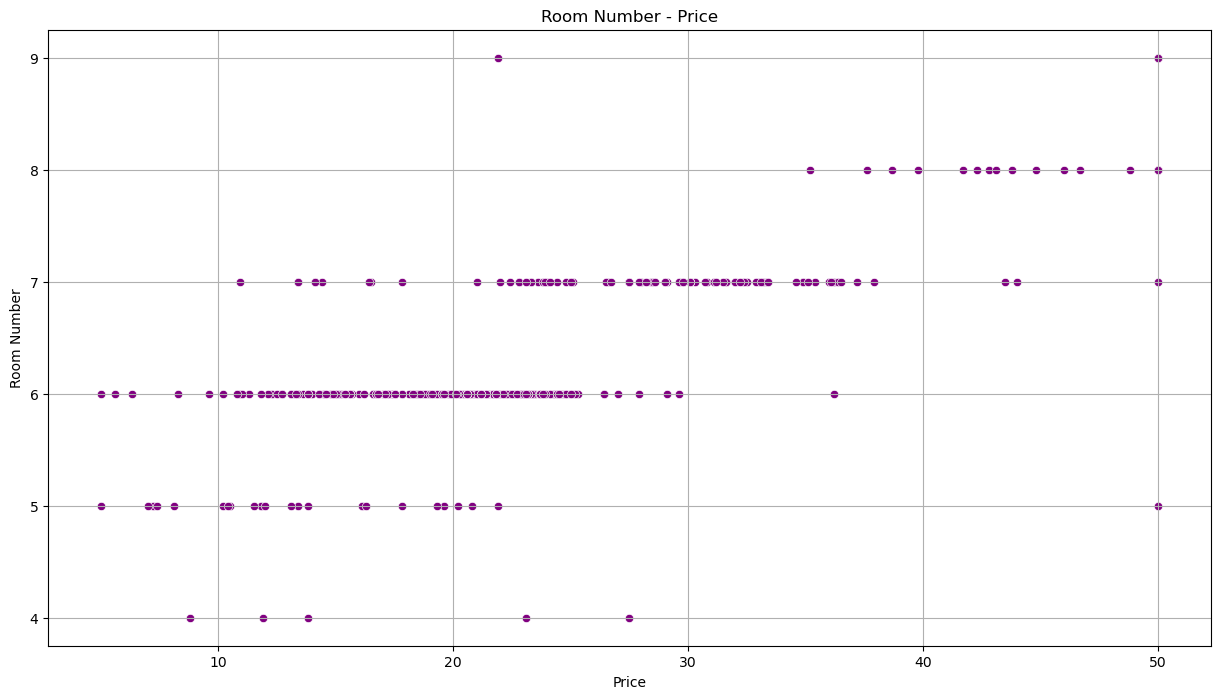

In [188]:
# Scatter plot
sns.scatterplot(x='Price',y='Room Number',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Room Number - Price')
plt.show()

**Interpretation**
 - We cannot interpret much from this graph

#### Air Quality - Residential Area

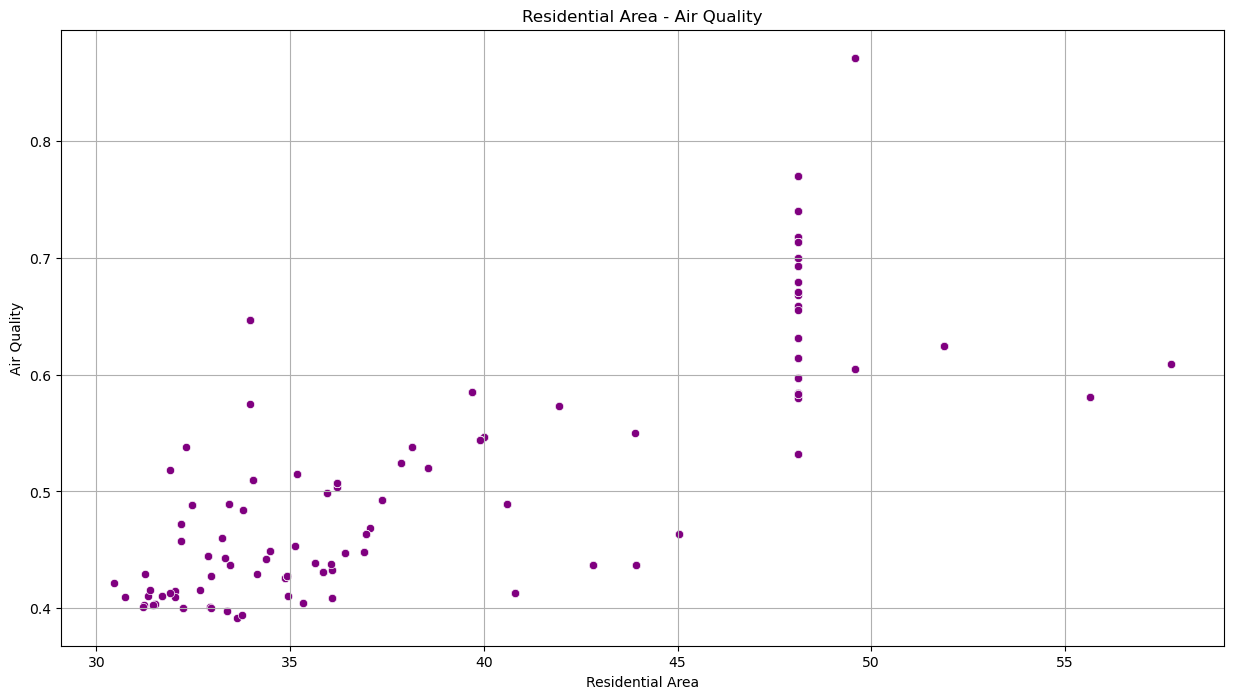

In [191]:
# Scatter plot
sns.scatterplot(x='Residential Area',y='Air Quality',data=df_num,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Residential Area - Air Quality')
plt.show()

**Interpretation**
 - There is a strong positive corelation
 - This means that the smaller the Residential area the lower the Air quality
 - The bigger the residential area, the higher the Air quality

#### Numerical to categorical

In [194]:
#### Residential Area - Air Quality
#### Distance1 - Age
#### Proportion of poor population - Distance1
#### Proportion of poor population - Price

In [195]:
df_cat.columns

Index(['Airport', 'Waterbody'], dtype='object')

#### Airport - Residential Area

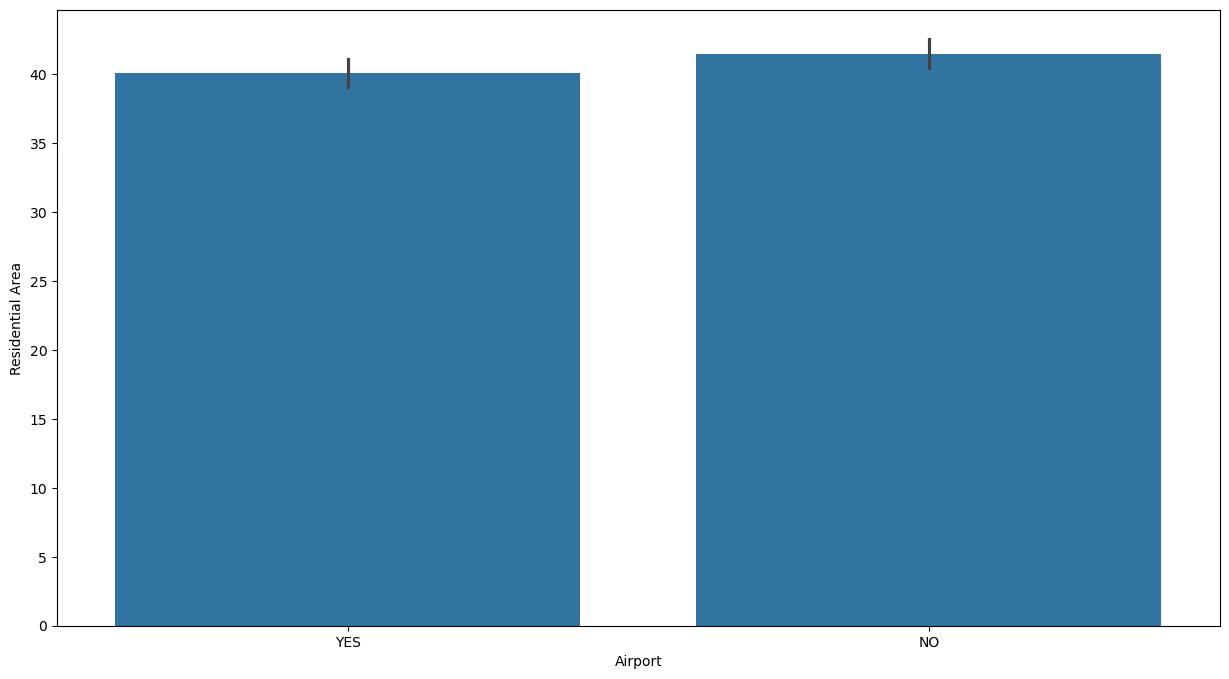

In [197]:
sns.barplot(x='Airport',y='Residential Area',data=df_house_price)
plt.show()

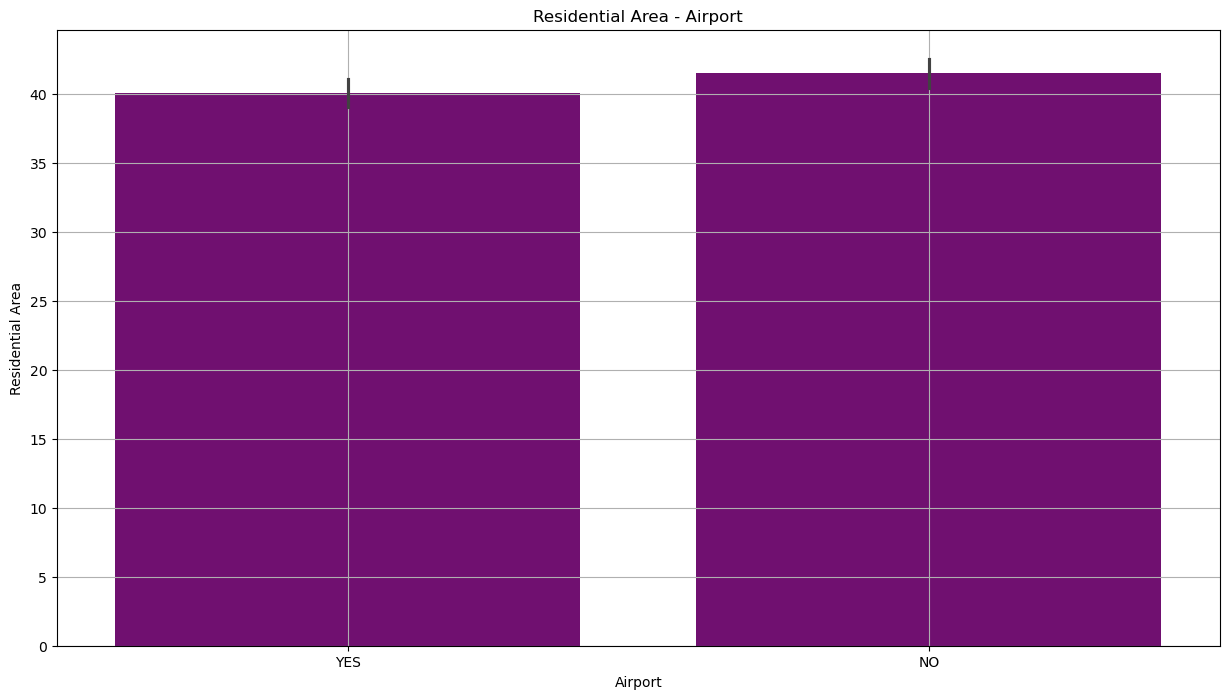

In [198]:
# Bar plot
sns.barplot(x='Airport',y='Residential Area',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Residential Area - Airport')
plt.show()

**Inpretation**
 - When we have a airport, residential area is lower as compare to when we dont have airport
 - Numbers are like when we have airport,the residential area is 40, when we dont have airport it is 42

#### Airport - Air Quality

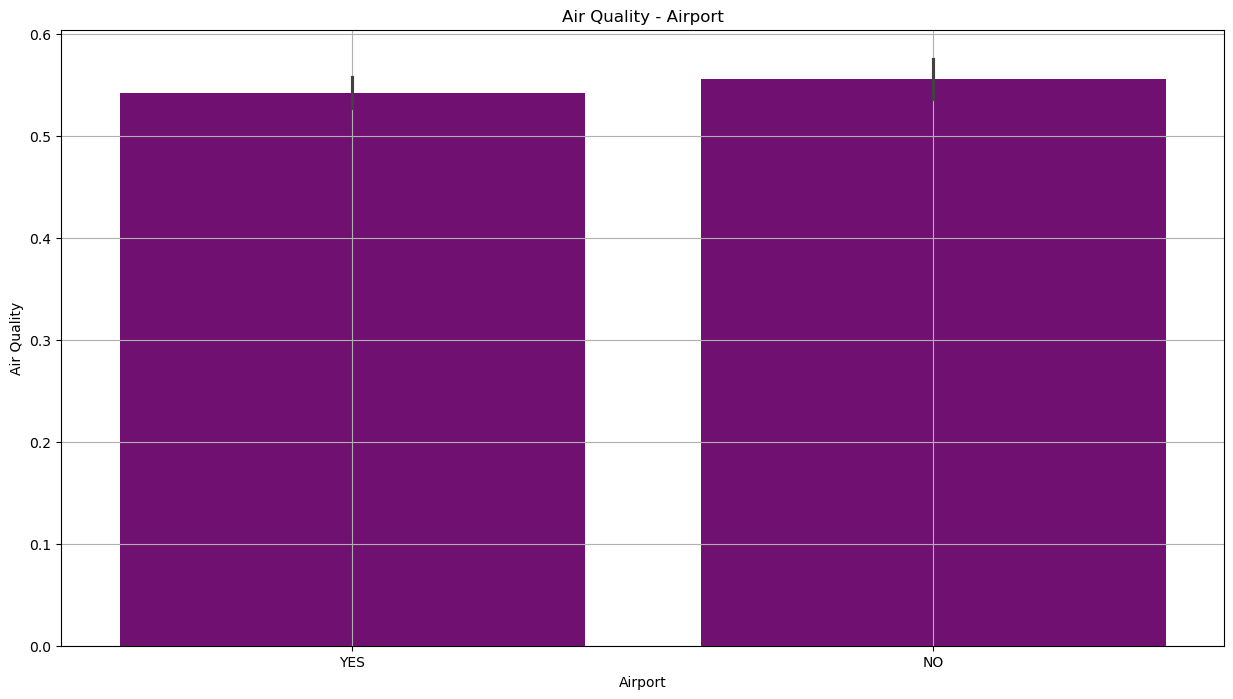

In [201]:
# Bar plot
sns.barplot(x='Airport',y='Air Quality',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Air Quality - Airport')
plt.show()

**Interpretation**
 - When we have the airport the air quality is approx 0.54 and when we dont have it is 0.55

#### Proportion of poor population - Airport

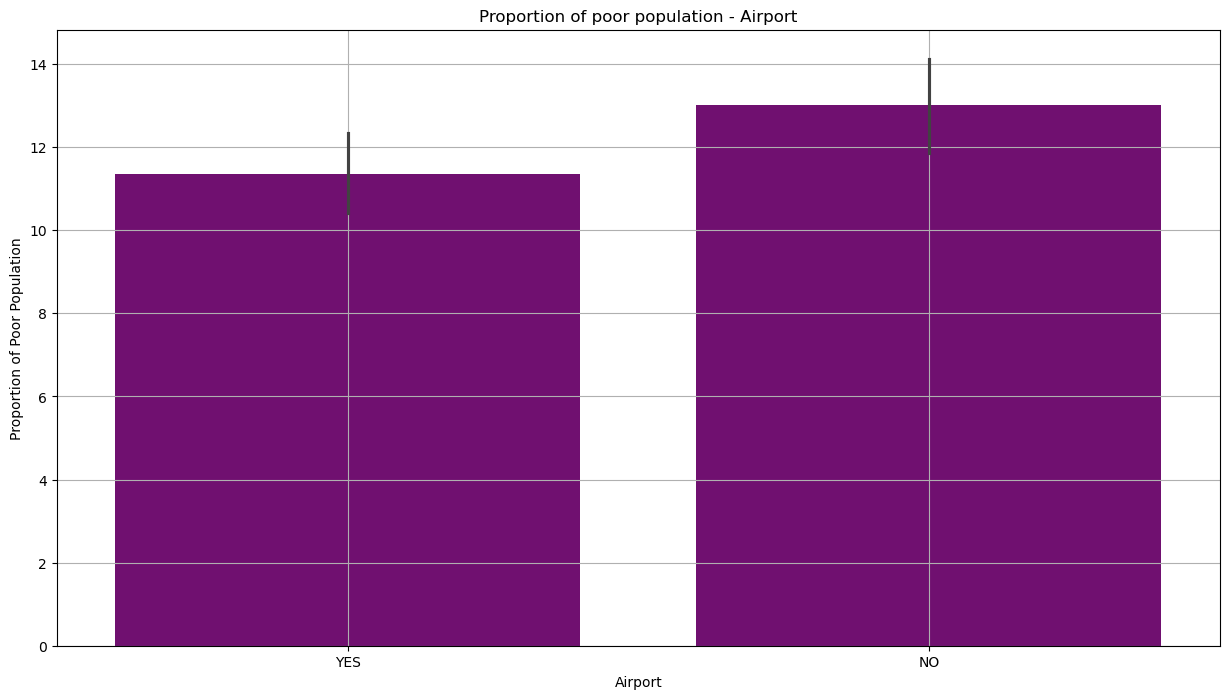

In [204]:
# Bar plot
sns.barplot(x='Airport',y='Proportion of Poor Population',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Proportion of poor population - Airport')
plt.show()

In [205]:
df_num.columns

Index(['Price', 'Residential Area', 'Air Quality', 'Room Number', 'Age',
       'Distance1', 'Teachers', 'Proportion of Poor Population',
       'Number of Hospital Beds', 'Number of Hotel Rooms', 'Rainfall', 'Sold'],
      dtype='object')

**Interpretation**
 - when we have the airport the proportion of poor population is 11.5 and when we dont have an airport the proportion of poor population is 13

#### Distance1 - Airport

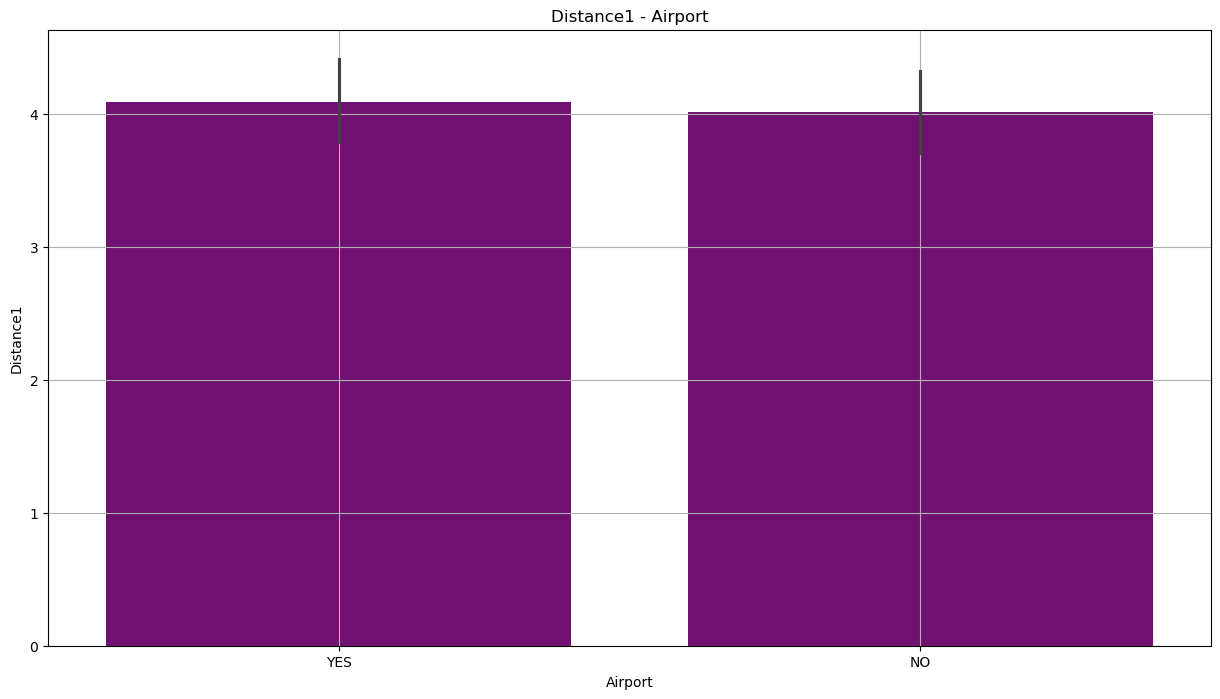

In [208]:
# Bar plot
sns.barplot(x='Airport',y='Distance1',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Distance1 - Airport')
plt.show()

**Interpretation**
 - When we have airport the distance1 4.2 and when we dont have airport the distance is little shorter where distance1 is 4.

#### Airport - Age

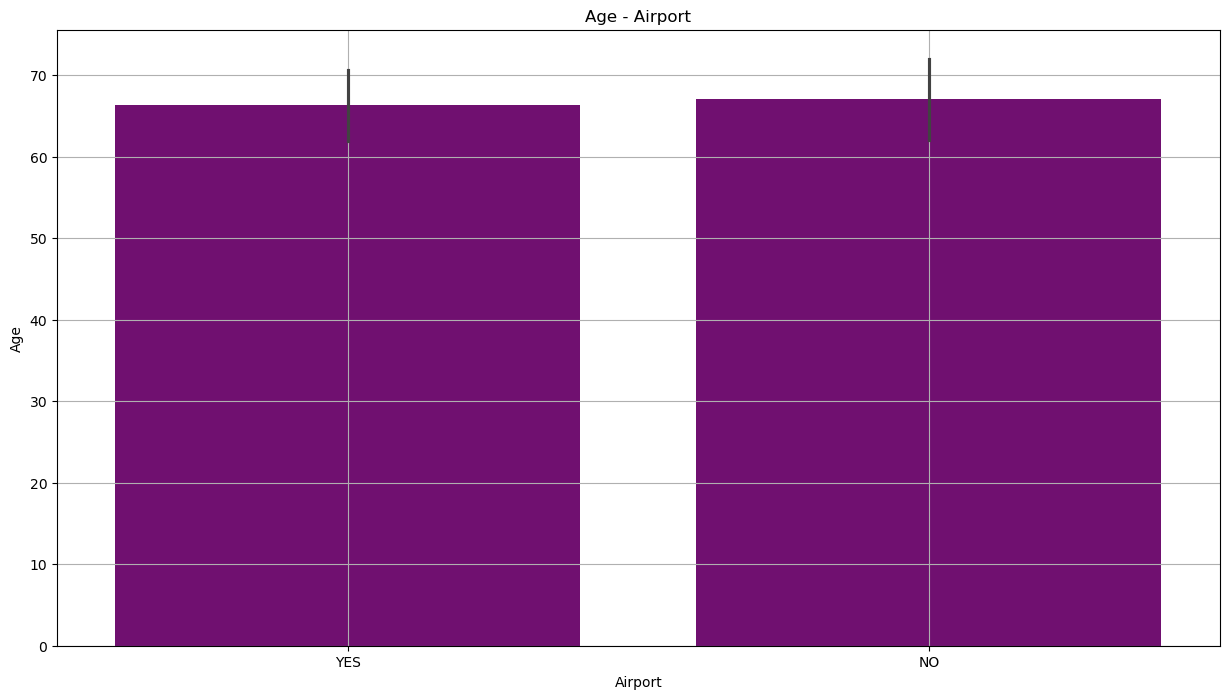

In [211]:
# Bar plot
sns.barplot(x='Airport',y='Age',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Age - Airport')
plt.show()

**Interpretation**
 - When we have airport or when we dont have airport there is no much effect on the age.

#### Airport - Price

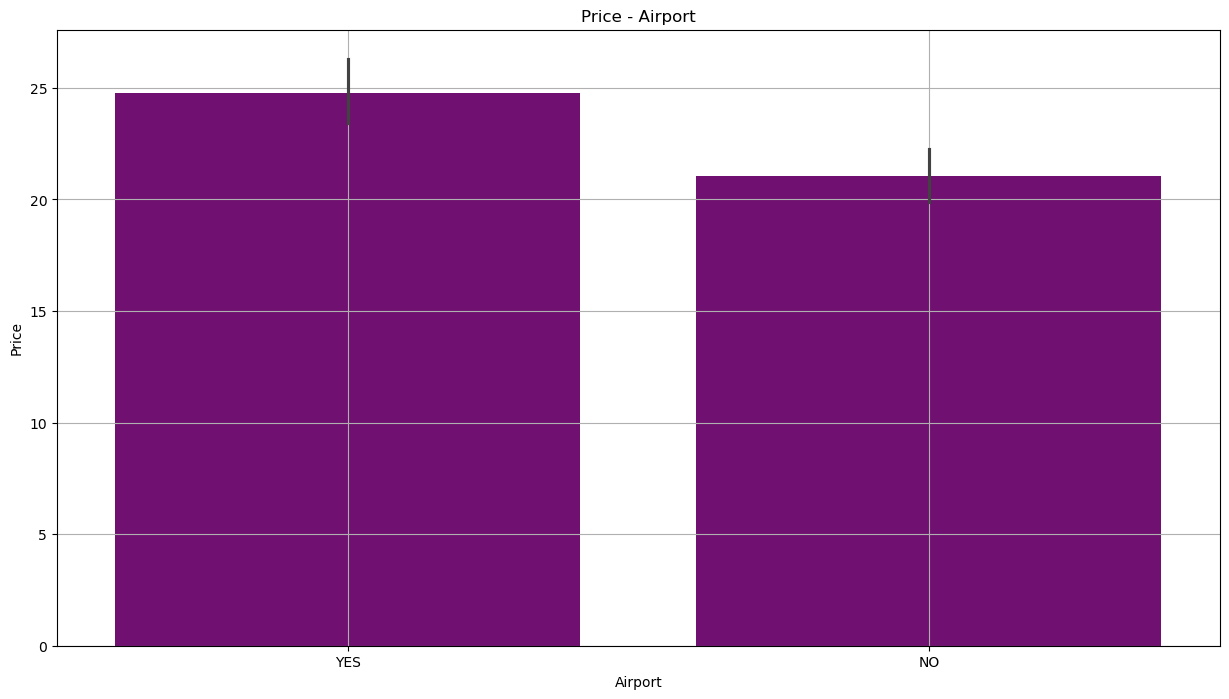

In [214]:
# Bar plot
sns.barplot(x='Airport',y='Price',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Price - Airport')
plt.show()

**Interpretation**
 - When we have airport the prices are higher where price is approx 25 and when we dont have aiport the price is lesser where price is 21.

#### Waterbody - Residential Area

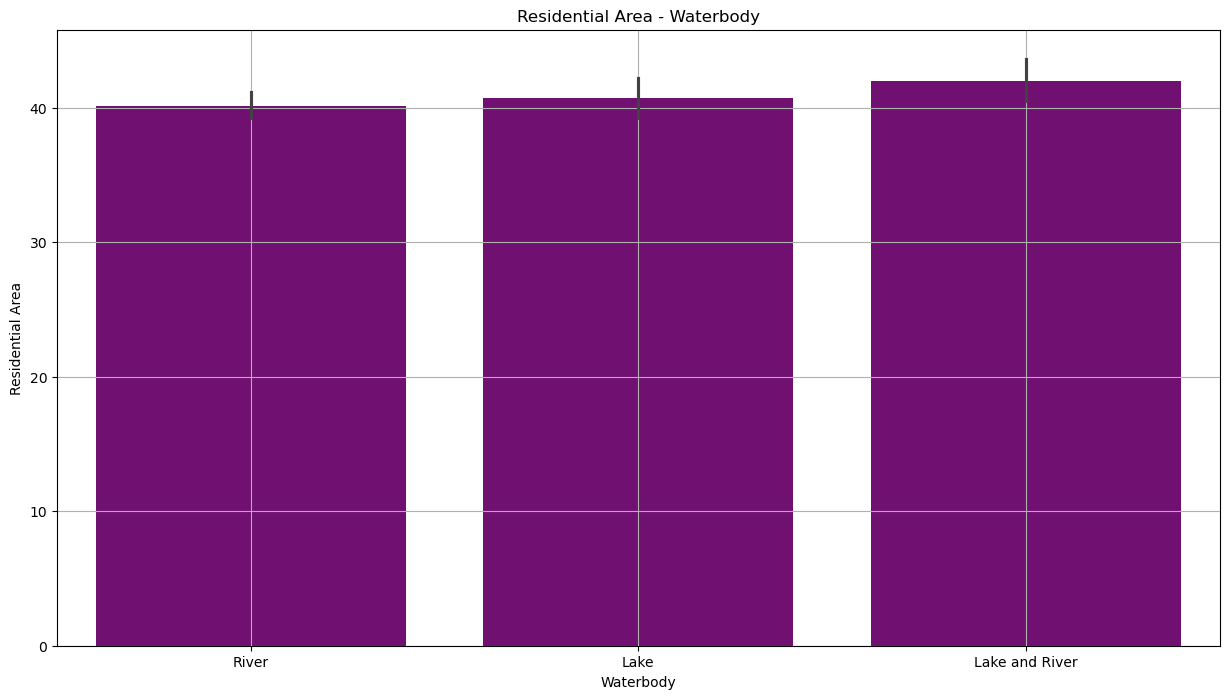

In [217]:
# Bar plot
sns.barplot(x='Waterbody',y='Residential Area',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Residential Area - Waterbody')
plt.show()

**Interpretation**
 - The Residential area near Lake and River both is higher than Lake Waterbody higher than River.
 - The Residential area near Lake and River both is 45.
 - The Residential area near Lake waterbody is 42.
 - The Residential area near River is approximately 40.

#### Waterbody - Air Quality

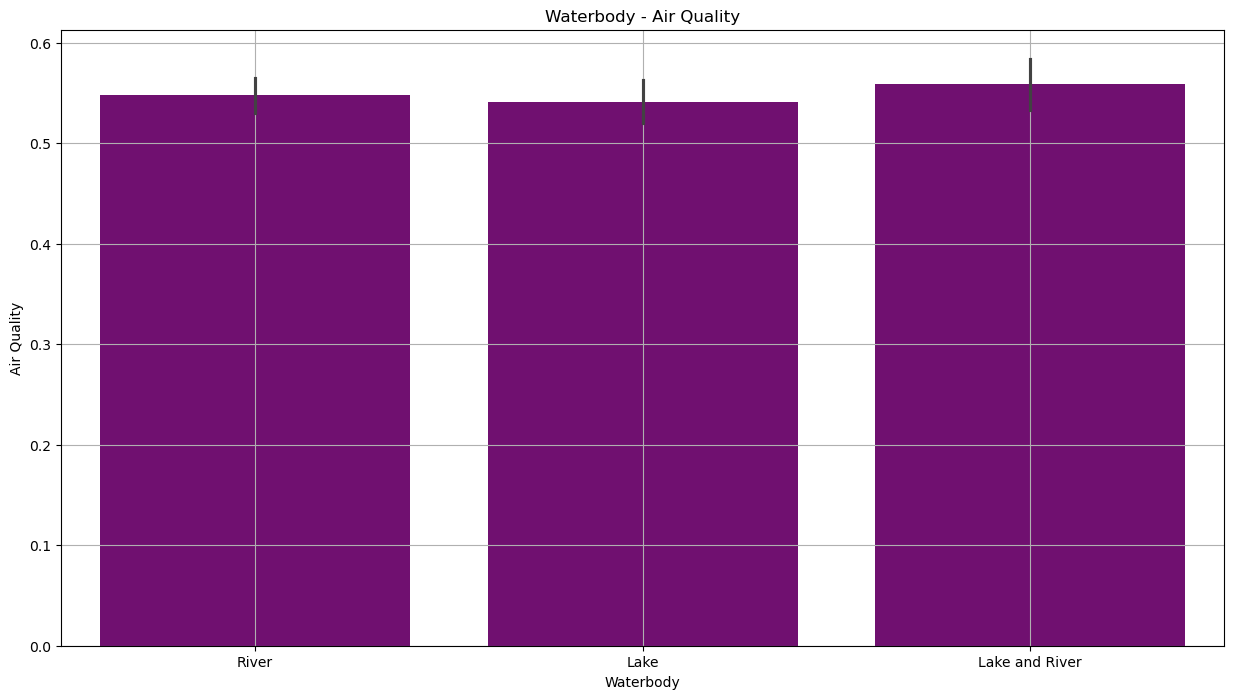

In [220]:
# Bar plot
sns.barplot(x='Waterbody',y='Air Quality',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Waterbody - Air Quality')
plt.show()

**Interpretation**
 - Air Quality near River is 0.55
 - Air Quality near Lake is 0.53
 - Air Quality near Lake and River both is 0.56
 - The Air quality at Lake is lower than Air quality near River followed by Lake and River both.

#### Waterbody - Distance1

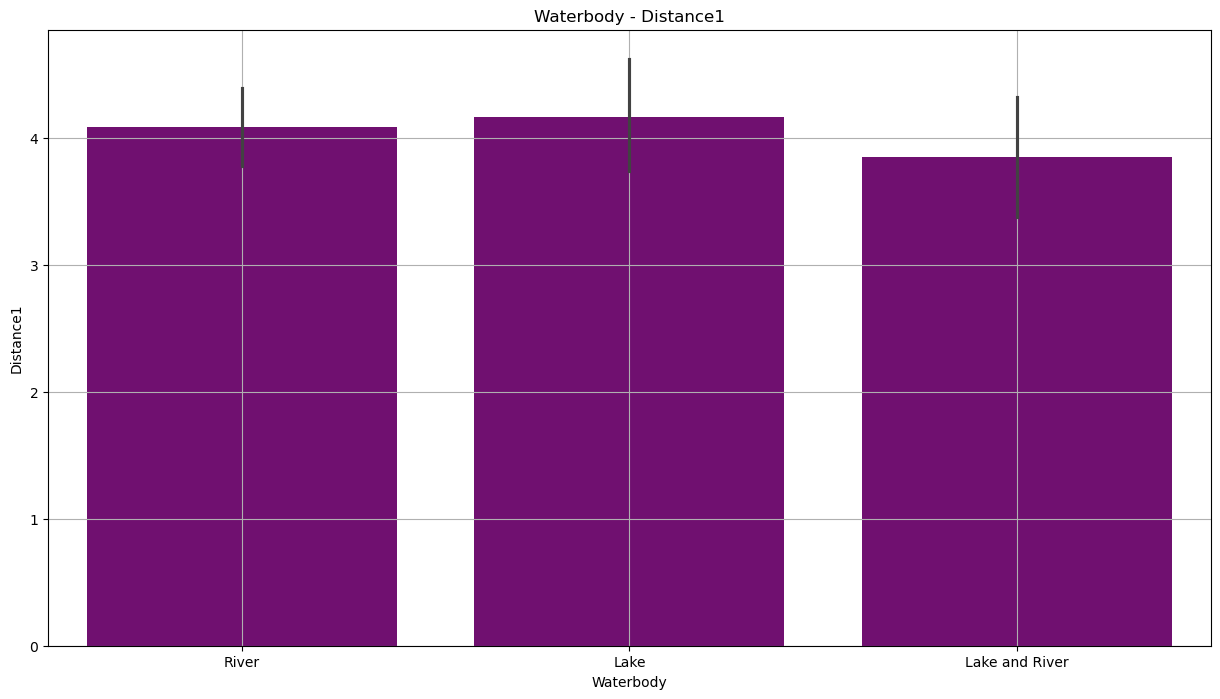

In [223]:
# Bar plot
sns.barplot(x='Waterbody',y='Distance1',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Waterbody - Distance1')
plt.show()

**Interpretation**
 - The Distance1 at Lake and River is 3.8
 - The Distance1 at Lake is 4.2
 - The Distance1 at River is 4.1
 - The Distance1 at Lake and River both is lower than Lake waterbody and River waterbody both, followed by River waterbody and then Lake waterbody

#### Waterbody - Age

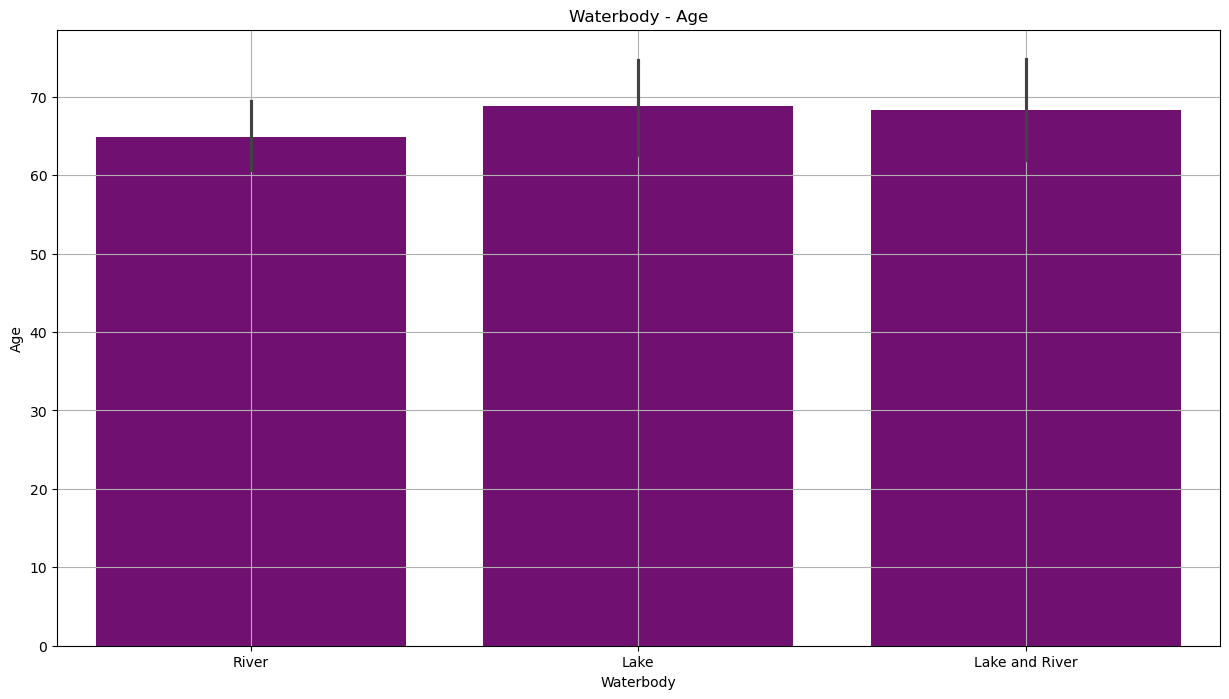

In [226]:
# Bar plot
sns.barplot(x='Waterbody',y='Age',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Waterbody - Age')
plt.show()

**Interpretation**
 - The Age near River waterbody is lower than Lake waterbody and Lake and River waterbody.
 - The Age near Lake water body is highest.
 - The Age near River is 65
 - The Age near Lake is 69
 - The Age near Lake and river waterbody is 68

#### Waterbody - Proportion of Poor Population

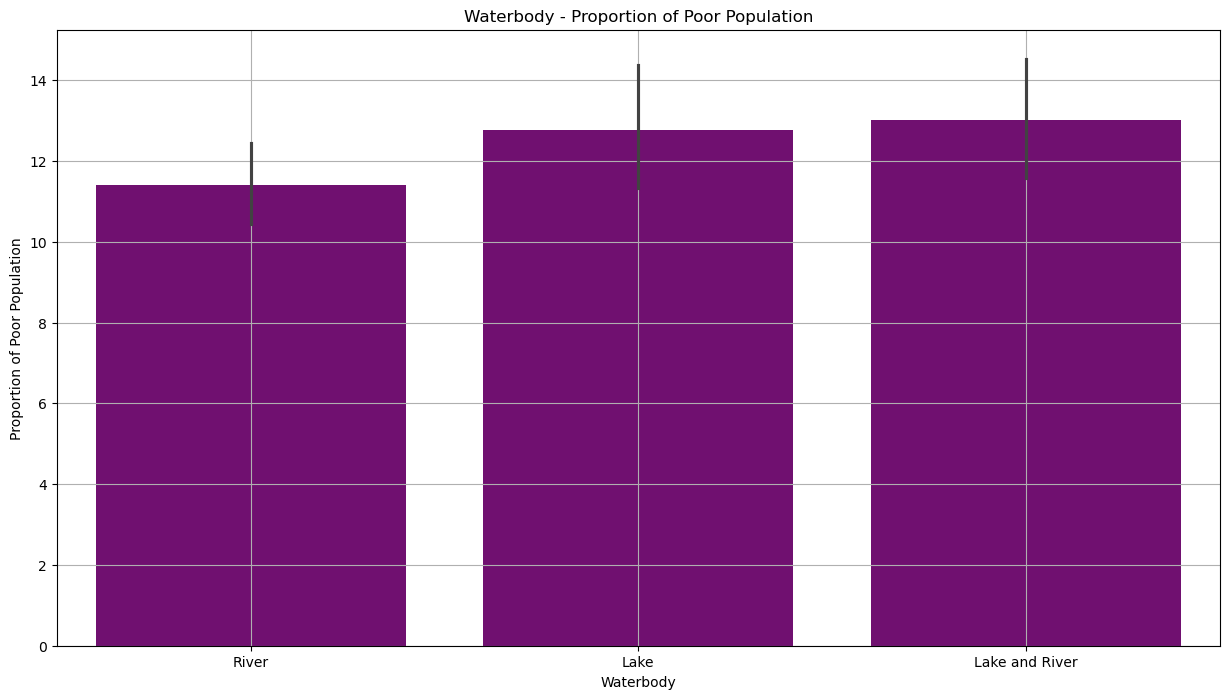

In [229]:
# Bar plot
sns.barplot(x='Waterbody',y='Proportion of Poor Population',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Waterbody - Proportion of Poor Population')
plt.show()

**Interpretation**
 - The Proportion of Poor Population near River is 11.2
 - The Proportion of Poor Population near Lake is 12.8
 - The Proportion of Poor Population near Lake and River waterbody is 13
 - The Proportion of Poor Population near Lake and River waterbody is higher than Lake which is higher than River.

#### Waterbody - Price

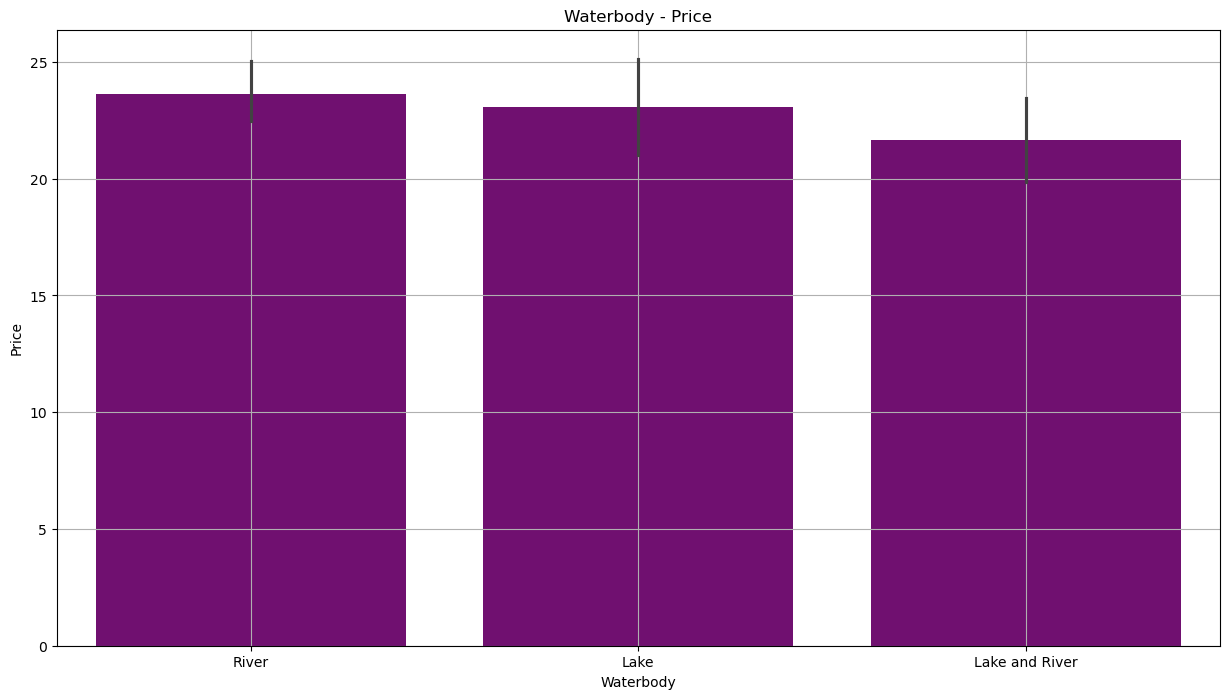

In [232]:
# Bar plot
sns.barplot(x='Waterbody',y='Price',data=df_house_price,color='purple')
plt.xticks(rotation=0)
plt.grid()
plt.title('Waterbody - Price')
plt.show()

**Interpretation**
 - The Price near River is higher than Lake waterbody which is higher than Lake and River waterbody both.
 - The Price near River is 23.5
 - The Price near Lake is 23
 - The Price near Lake and River both is 22.

### Multi Variate Analysis

In [235]:
## whenever we use more than 2 columns at a time for analysis is called multi variate analysis.
# Rules :
# we need to have two categorical and one numerical column
# we are going to use cross tab

#### Airport - Waterbody - Price

In [237]:
# Average
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Price,aggfunc='mean')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,21.033333,19.007895,22.040506
YES,24.541818,24.751515,24.925253


In [238]:
# Minimum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Price,aggfunc='min')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,5.0,7.2,6.3
YES,5.6,8.1,5.0


In [239]:
#Maximum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Price,aggfunc='max')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,43.5,42.3,50.0
YES,50.0,43.8,50.0


**Interpretation**
 - When we dont have the airport and waterbody as lake then average price of the house is 21.033.
 - when we have the airport and waterbody is lake again the the avergae price of the house is 24.542.

 - when we dont have the airport and the water body is both lake and river the avg price of the house is 19.008.
 - when we have the airport and water body is lake and river the avg price is the house is 24.751.

 - when we dont have the airport and the water body is river the avg price of the house is 22.041.
 - when we have the airport and water body is river the avg price is the house is 24.925.

 - When we dont have the airport and waterbody as lake then Minimum price of the house is 5.
 - when we have the airport and waterbody is lake again the the Minimum price of the house is 5.6.

 - when we dont have the airport and the water body is both lake and river the Minimum price of the house is 7.2.
 - when we have the airport and water body is lake and river the Minimum price is the house is 8.1.

 - when we dont have the airport and the water body is river the Minimum price of the house is 6.3.
 - when we have the airport and water body is river the Minimum price is the house is 5.

 - When we dont have the airport and waterbody as lake then Maximum price of the house is 43.5.
 - when we have the airport and waterbody is lake again the the Maximum price of the house is 50.

 - when we dont have the airport and the water body is both lake and river the Maximum price of the house is 42.3.
 - when we have the airport and water body is lake and river the Maximum price is the house is 43.8.

 - when we dont have the airport and the water body is river the Maximum price of the house is 50.
 - when we have the airport and water body is river the Maximum price is the house is 50.

#### Airport - Waterbody - Residential Area

In [242]:
# Average
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Residential Area'],aggfunc='mean')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,41.556923,43.366053,40.552785
YES,40.192545,40.454848,39.877778


In [243]:
# Minimum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Residential Area'],aggfunc='min')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,31.47,32.03,31.25
YES,30.74,31.38,30.46


In [244]:
# Maximum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Residential Area'],aggfunc='max')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,55.65,51.89,55.65
YES,55.65,57.74,57.74


**Interpretation**
 - When we dont have the airport and waterbody as lake then average Residential Area is 41.557
 - when we have the airport and waterbody is lake again the the avergae Residential Area is 40.192

 - when we dont have the airport and the water body is both lake and river the avg Residential Area is 43.366
 - when we have the airport and water body is both lake and river the avg Residential Area is 40.455

 - when we dont have the airport and the water body is river the avg Residential Area is 40.553
 - when we have the airport and water body is river the avg Residential Area is 39.877

 - When we dont have the airport and waterbody as lake then Minimum Residential Area is 31.47.
 - when we have the airport and waterbody is lake again the the Minimum Residential Area is 30.74

 - when we dont have the airport and the water body is both lake and river the Minimum Residential Area is 32.03
 - when we have the airport and water body is lake and river the Minimum Residential Area is 31.38

 - when we dont have the airport and the water body is river the Minimum Residential Area is 31.25
 - when we have the airport and water body is river the Minimum Residential Area is 30.46

 - When we dont have the airport and waterbody as lake then Maximum Residential Area is 55.65.
 - when we have the airport and waterbody is lake again the the Maximum Residential Area is 55.65.
 - This means there is no effect on the Residential Area w.r.t Airport and Waterbody.

 - when we dont have the airport and the water body is both lake and river the Maximum Residential Area is 51.89.
 - when we have the airport and water body is lake and river the Maximum Residential Area is 57.74.

 - when we dont have the airport and the water body is river the Maximum Residential Area is 55.65.
 - when we have the airport and water body is river the Maximum Residential Area is 57.74.

#### Airport - Waterbody - Air Quality

In [247]:
# Average
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Air Quality'],aggfunc='mean')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,0.559790,0.574842,0.544203
YES,0.527235,0.540033,0.550617


In [248]:
# Minimum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Air Quality'],aggfunc='min')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,0.4,0.398,0.392
YES,0.4,0.400,0.400


In [249]:
# Maximum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Air Quality'],aggfunc='max')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,0.871,0.871,0.871
YES,0.871,0.770,0.871


**Interpretation**
 - When we dont have the airport and waterbody as lake then average Air Quality is 0.559
 - when we have the airport and waterbody is lake again the the avergae Air Quality is 0.527

 - when we dont have the airport and the water body is both lake and river the avg Air Quality is 0.575
 - when we have the airport and water body is both lake and river the avg Air Quality is 0.540

 - when we dont have the airport and the water body is river the avg Air Quality is 0.544
 - when we have the airport and water body is river the avg Air Quality is 0.551

 - When we dont have the airport and waterbody as lake then Minimum Air Quality is 0.4
 - when we have the airport and waterbody is lake again the the Minimum Air Quality is 0.4
 - This means there is no effect on Minimum Air Quality w.r.t Airport and Waterbody.

 - when we dont have the airport and the water body is both lake and river the Minimum Air Quality is 0.398
 - when we have the airport and water body is lake and river the Minimum Air Quality is 0.4

 - when we dont have the airport and the water body is river the Minimum Air Quality is 0.392
 - when we have the airport and water body is river the Minimum Air Quality is 0.4

 - When we dont have the airport and waterbody as lake then Maximum Air Quality is 0.871
 - when we have the airport and waterbody is lake again the the Maximum Air Quality is 0.871
 - This means there is no effect on the Maximum Air Quality w.r.t Airport and Waterbody.

 - when we dont have the airport and the water body is both lake and river the Maximum Air Quality is 0.871.
 - when we have the airport and water body is lake and river the Maximum Air Quality is 0.77.

 - when we dont have the airport and the water body is river the Maximum Air Quality is 0.871.
 - when we have the airport and water body is river the Maximum Air Quality is 0.871.
 - This means there is no effect on the Maximum Air Quality w.r.t Airport and Waterbody.

#### Airport - Waterbody - Proportion of Poor Population

In [252]:
# Average
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Proportion of Poor Population'],aggfunc='mean')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,14.663590,14.177368,11.633671
YES,11.423273,11.681212,11.222525


In [253]:
# Minimum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Proportion of Poor Population'],aggfunc='min')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,3.16,3.11,3.11
YES,1.92,3.13,1.98


In [254]:
# Maximum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price['Proportion of Poor Population'],aggfunc='max')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,37.97,31.99,30.63
YES,26.77,29.68,36.98


**Interpretation**
 - When we dont have the airport and waterbody as lake then average Proportion of Poor Population is 14.663
 - when we have the airport and waterbody is lake again the the avergae Proportion of Poor Population is 11.423

 - when we dont have the airport and the water body is both lake and river the avg Proportion of Poor Population is 14.177
 - when we have the airport and water body is both lake and river the avg Proportion of Poor Population is 11.681

 - when we dont have the airport and the water body is river the avg Proportion of Poor Population is 11.633
 - when we have the airport and water body is river the avg Proportion of Poor Population is 11.222

 - When we dont have the airport and waterbody as lake then Minimum Proportion of Poor Population is 3.16
 - when we have the airport and waterbody is lake again the the Minimum Proportion of Poor Population is 1.92

 - when we dont have the airport and the water body is both lake and river the Minimum Proportion of Poor Population is 3.11
 - when we have the airport and water body is lake and river the Minimum Proportion of Poor Population is 3.13

 - when we dont have the airport and the water body is river the Minimum Proportion of Poor Population is 3.11
 - when we have the airport and water body is river the Minimum Proportion of Poor Population is 1.98

 - When we dont have the airport and waterbody as lake then Maximum Proportion of Poor Population is 37.97
 - when we have the airport and waterbody is lake again the the Maximum Proportion of Poor Population is 26.77

 - when we dont have the airport and the water body is both lake and river the Maximum Proportion of Poor Population is 31.99
 - when we have the airport and water body is lake and river the Maximum Proportion of Poor Population is 29.68

 - when we dont have the airport and the water body is river the Maximum Proportion of Poor Population is 30.63
 - when we have the airport and water body is river the Maximum Proportion of Poor Population is 36.98

#### Airport - Waterbody - Distance1

In [257]:
# Average
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Distance1,aggfunc='mean')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,3.980769,3.594211,4.235190
YES,4.286182,4.146364,3.958687


In [258]:
# Minimum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Distance1,aggfunc='min')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,1.46,1.46,1.47
YES,1.52,1.73,1.34


In [259]:
# Maximum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Distance1,aggfunc='max')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,8.00,9.18,10.82
YES,12.32,9.44,10.98


**Interpretation**
 - When we dont have the airport and waterbody as lake then average Distance1 is 3.981
 - when we have the airport and waterbody is lake again the the average Distance1 is 4.286

 - when we dont have the airport and the water body is both lake and river the avg Distance1 is 3.594
 - when we have the airport and water body is both lake and river the avg Distance1 is 4.146

 - when we dont have the airport and the water body is river the avg Distance1 is 4.235
 - when we have the airport and water body is river the avg Distance1 is 3.959

 - When we dont have the airport and waterbody as lake then Minimum Distance1 is 1.46
 - when we have the airport and waterbody is lake again the the Minimum Distance1 is 1.52

 - when we dont have the airport and the water body is both lake and river the Minimum Distance1 is 1.46
 - when we have the airport and water body is lake and river the Minimum Distance1 is 1.73
   
 - when we dont have the airport and the water body is river the Minimum Distance1 is 1.47
 - when we have the airport and water body is river the Minimum Distance1 is 1.34

 - When we dont have the airport and waterbody as lake then Maximum Distance1 is 8
 - when we have the airport and waterbody is lake again the the Maximum Distance1 is 12.32

 - when we dont have the airport and the water body is both lake and river the Maximum Distance1 is 9.18
 - when we have the airport and water body is lake and river the Maximum Distance1 is 9.44

 - when we dont have the airport and the water body is river the Maximum Distance1 is 10.82
 - when we have the airport and water body is river the Maximum Distance1 is 10.98

#### Airport - Waterbody - Age

In [262]:
# Average
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Age,aggfunc='mean')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,70.800000,69.076316,64.201266
YES,67.352727,67.345455,65.385859


In [263]:
# Minimum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Age,aggfunc='min')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,8.9,2.9,6.0
YES,6.2,18.4,6.5


In [264]:
# Maximum
pd.crosstab(index=df_house_price.Airport,columns=df_house_price.Waterbody,values=df_house_price.Age,aggfunc='max')

Waterbody,Lake,Lake and River,River
Airport,,,
NO,100.0,100.0,100.0
YES,100.0,100.0,100.0


**Interpretation**
 - When we dont have the airport and waterbody as lake then average Age is 70.8
 - when we have the airport and waterbody is lake again the the average Age is 67.352

 - when we dont have the airport and the water body is both lake and river the avg Age is 69.076
 - when we have the airport and water body is both lake and river the avg Age is 67.345

 - when we dont have the airport and the water body is river the avg Age is 64.201
 - when we have the airport and water body is river the avg Age is 65.385

 - When we dont have the airport and waterbody as lake then Minimum Age is 8.9
 - when we have the airport and waterbody is lake again the the Minimum Age is 6.2

 - when we dont have the airport and the water body is both lake and river the Minimum Age is 2.9
 - when we have the airport and water body is lake and river the Minimum Age is 18.4
   
 - when we dont have the airport and the water body is river the Minimum Age is 6
 - when we have the airport and water body is river the Minimum Age is 6.5

 - When we dont have the airport and waterbody as lake then Maximum Age is 100
 - when we have the airport and waterbody is lake again the the Maximum Age is 100

 - when we dont have the airport and the water body is both lake and river the Age is 100
 - when we have the airport and water body is lake and river the Maximum Age is 100

 - when we dont have the airport and the water body is river the Maximum Age is 100
 - when we have the airport and water body is river the Maximum Age is 100
 - This means that the Maximum Age is not effected by Airport and type of Waterbody.

In [266]:
## full lenght analysis sheet.